<a href="https://colab.research.google.com/github/garciapg/Personalized-Investment-Recommendations-with-Clustering-Techniques/blob/main/Trade%26Ahead_Clustering_Unsupervised_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Personalized Investment Recommendations with Clustering Techniques

### Context

It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation.

Trade&Ahead is a financial consultancy firm that provides personalized investment strategies. The objective is to analyze the stocks, group them based on the attributes provided, and share the insights.

This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style='darkgrid')

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv('/content/drive/MyDrive/1 Data Science/Project 7 - Unsupervised/stock_data.csv')

In [ ]:
# Let's make a copy of the original data set
df = data.copy()

## Data Overview

In [ ]:
df.shape

(340, 15)

- There are 340 rows and 15 columns

In [ ]:
df.head()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,AAL,American Airlines Group,Industrials,Airlines,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,ABBV,AbbVie,Health Care,Pharmaceuticals,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,ABT,Abbott Laboratories,Health Care,Health Care Equipment,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,ADBE,Adobe Systems Inc,Information Technology,Application Software,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,ADI,"Analog Devices, Inc.",Information Technology,Semiconductors,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


In [ ]:
df.tail()

,Ticker Symbol,Security,GICS Sector,GICS Sub Industry,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
335,YHOO,Yahoo Inc.,Information Technology,Internet Software & Services,33.259998,14.887727,1.845149,15,459,-1032187000,-4359082000,-4.64,939457327.6,28.976191,6.261775
336,YUM,Yum! Brands Inc,Consumer Discretionary,Restaurants,52.516175,-8.698917,1.478877,142,27,159000000,1293000000,2.97,435353535.4,17.682214,-3.838260
337,ZBH,Zimmer Biomet Holdings,Health Care,Health Care Equipment,102.589996,9.347683,1.404206,1,100,376000000,147000000,0.78,188461538.5,131.525636,-23.884449
338,ZION,Zions Bancorp,Financials,Regional Banks,27.299999,-1.158588,1.468176,4,99,-43623000,309471000,1.20,257892500.0,22.749999,-0.063096
339,ZTS,Zoetis,Health Care,Pharmaceuticals,47.919998,16.678836,1.610285,32,65,272000000,339000000,0.68,498529411.8,70.470585,1.723068


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

- There are 4 object type variables and 11 numeric variables; 7 float type and 4 integers.

In [ ]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Ticker Symbol,340,340,AAL,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Security,340,340,American Airlines Group,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sector,340,11,Industrials,53,NaN,NaN,NaN,NaN,NaN,NaN,NaN
GICS Sub Industry,340,104,Oil & Gas Exploration & Production,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Current Price,340.0,NaN,NaN,NaN,80.862345,98.055086,4.5,38.555,59.705,92.880001,1274.949951
Price Change,340.0,NaN,NaN,NaN,4.078194,12.006338,-47.129693,-0.939484,4.819505,10.695493,55.051683
Volatility,340.0,NaN,NaN,NaN,1.525976,0.591798,0.733163,1.134878,1.385593,1.695549,4.580042
ROE,340.0,NaN,NaN,NaN,39.597059,96.547538,1.0,9.75,15.0,27.0,917.0
Cash Ratio,340.0,NaN,NaN,NaN,70.023529,90.421331,0.0,18.0,47.0,99.0,958.0
Net Cash Flow,340.0,NaN,NaN,NaN,55537620.588235,1946365312.175789,-11208000000.0,-193906500.0,2098000.0,169810750.0,20764000000.0


- There are 11 sectors, and the most frequent one is Industrials with 53 occurences.
- There are 104 sub industries, Oil & Gas Exploration & Production being the most frequent with 16 occurences.
- Average current price is 80.9 dollars, minimum price is 4.5 dollars, and max price is 1,274 dollars.
- Average price change is 4.08%.
- Average volatility is 1.52.
- Some of the features with the highest variance are Price Change, ROE, Cash Ratio, Net Cash Flow, Net Income, Earnings per share, P/E Ratio, and P/B Ratio.

### Duplicate values

In [ ]:
duplicated = df.duplicated().sum()
duplicated

0

- There are no duplicate values

### Missing values

In [ ]:
df.isnull().sum()

Ticker Symbol                   0
Security                        0
GICS Sector                     0
GICS Sub Industry               0
Current Price                   0
Price Change                    0
Volatility                      0
ROE                             0
Cash Ratio                      0
Net Cash Flow                   0
Net Income                      0
Earnings Per Share              0
Estimated Shares Outstanding    0
P/E Ratio                       0
P/B Ratio                       0
dtype: int64

- There are no missing values

## Exploratory Data Analysis (EDA)

### Functions to plot

In [ ]:
# function to create labeled barplots


def labeled_barplot(df, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(df[feature])  # length of the column
    count = df[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=df,
        x=feature,
        palette="Paired",
        order=df[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

In [ ]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(df, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=df, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=df, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        df[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        df[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

### Univariate Analysis

#### Numeric variables

In [ ]:
# First we'll separate the numeric variables
num_var = df.iloc[:,4:]

In [ ]:
num_var.head()

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


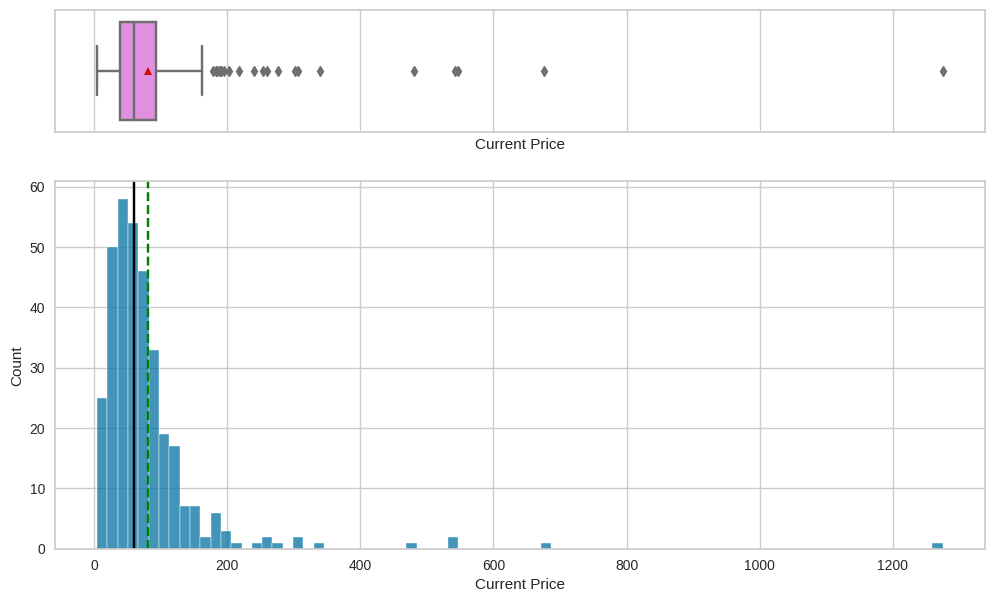

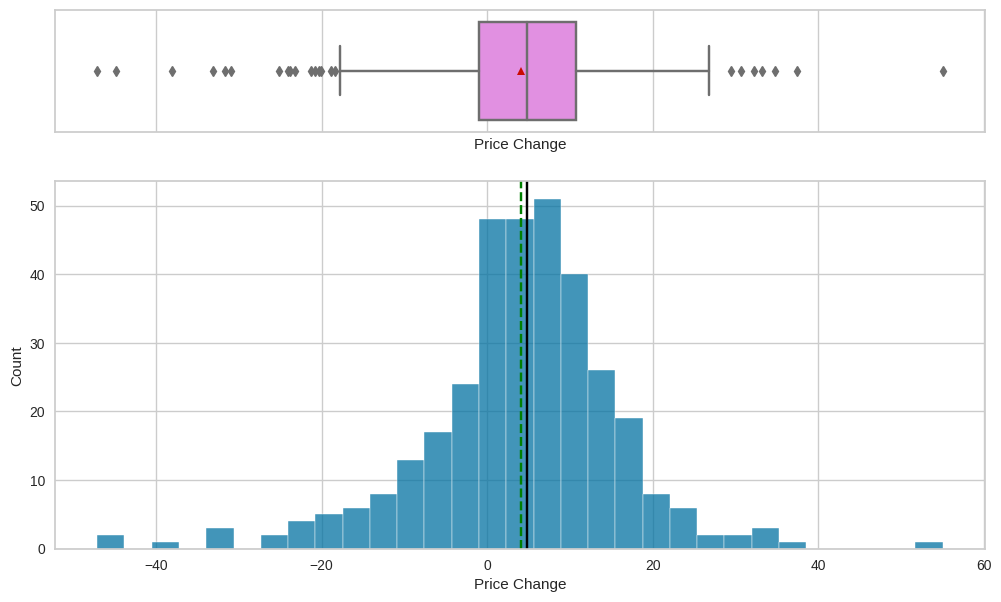

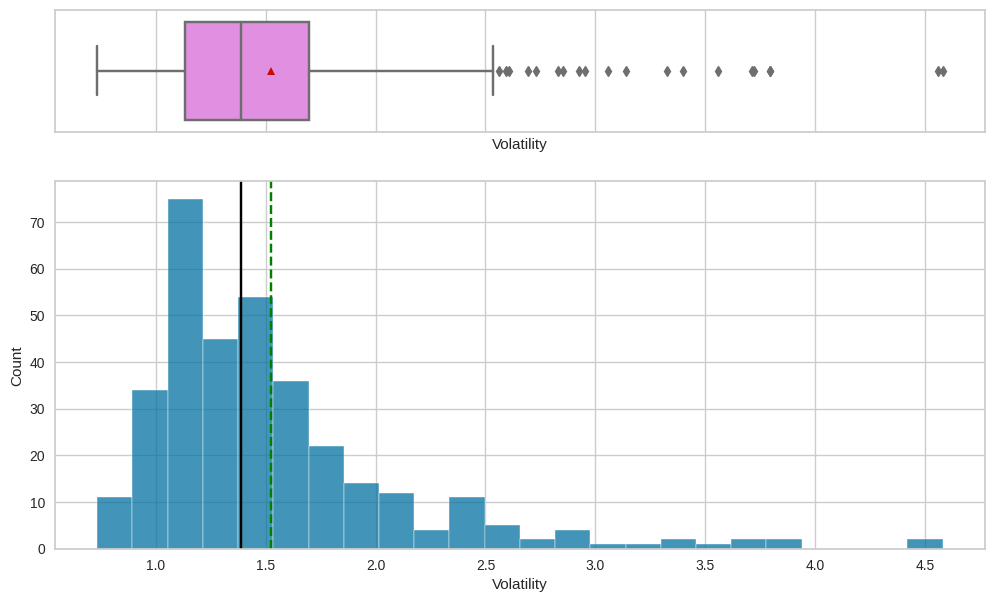

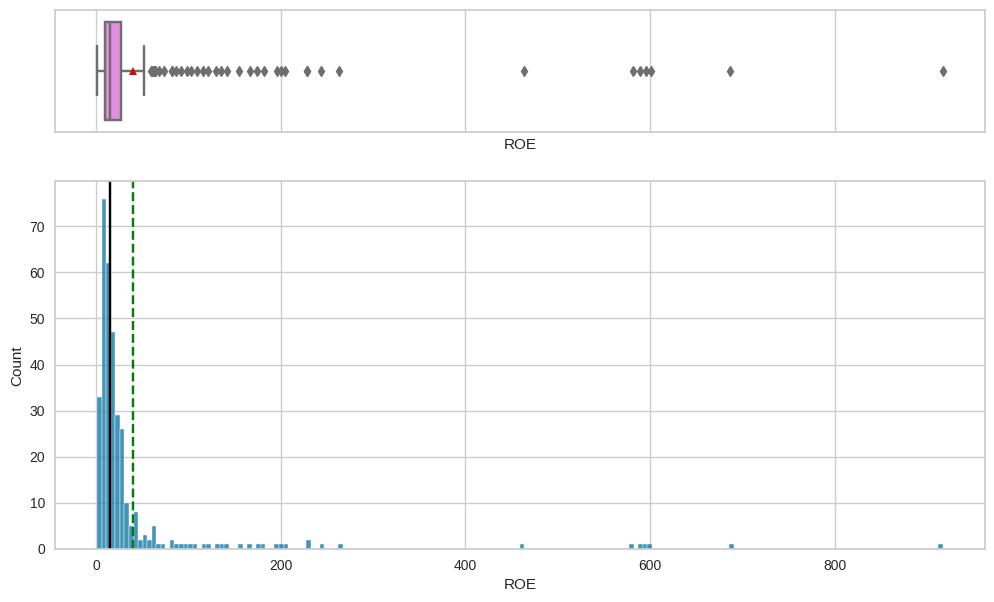

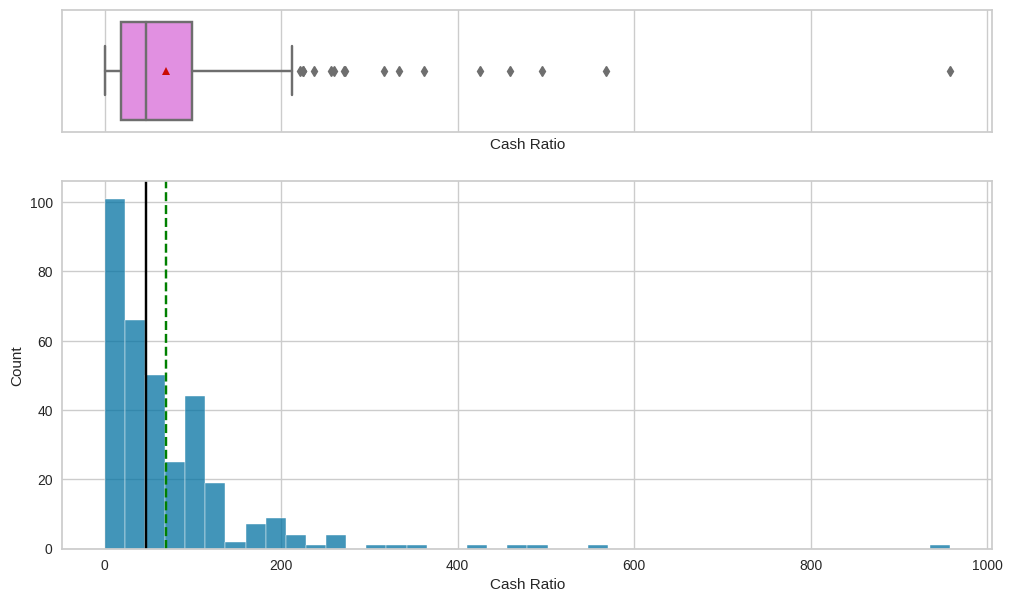

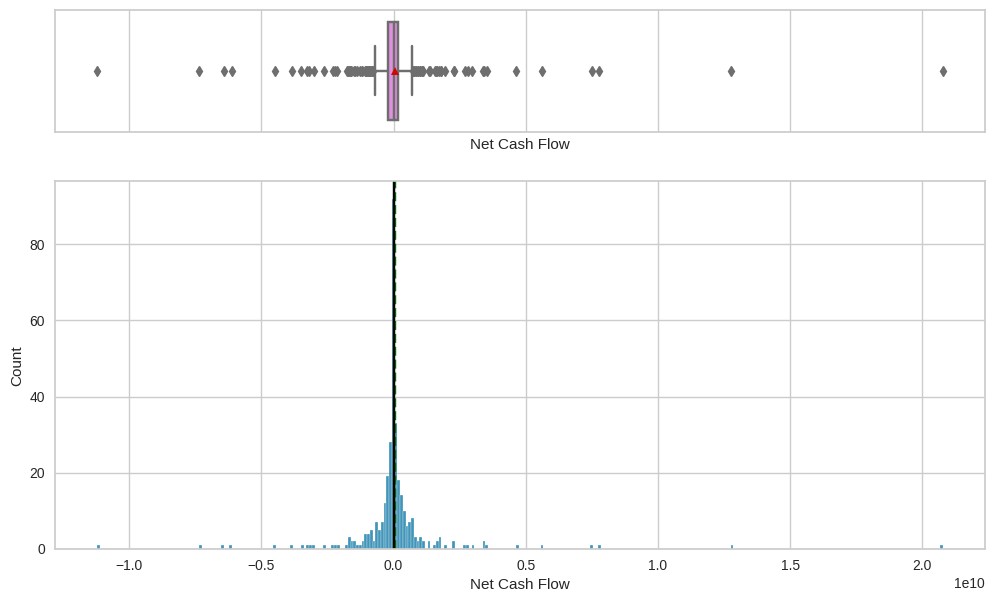

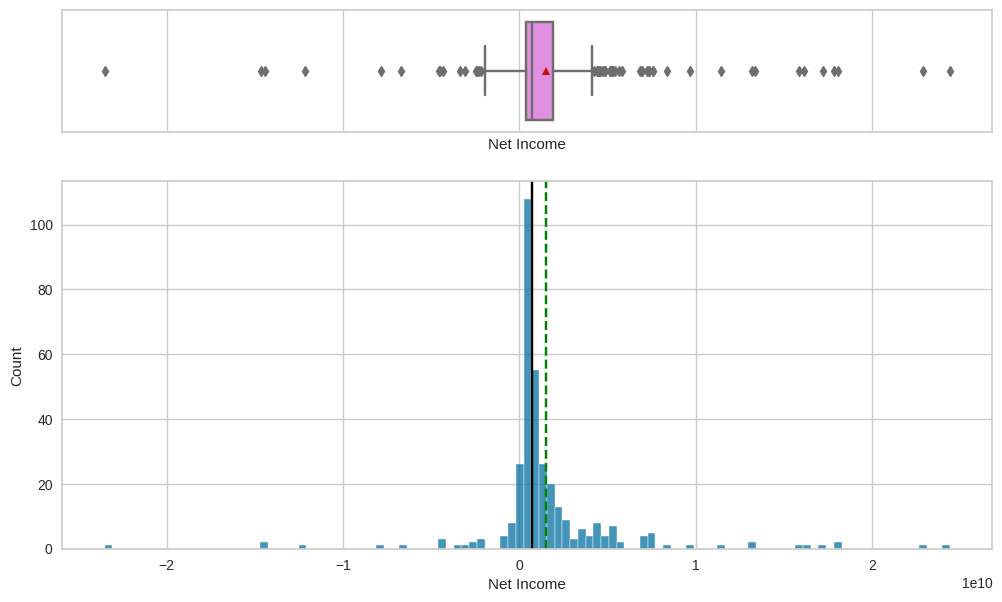

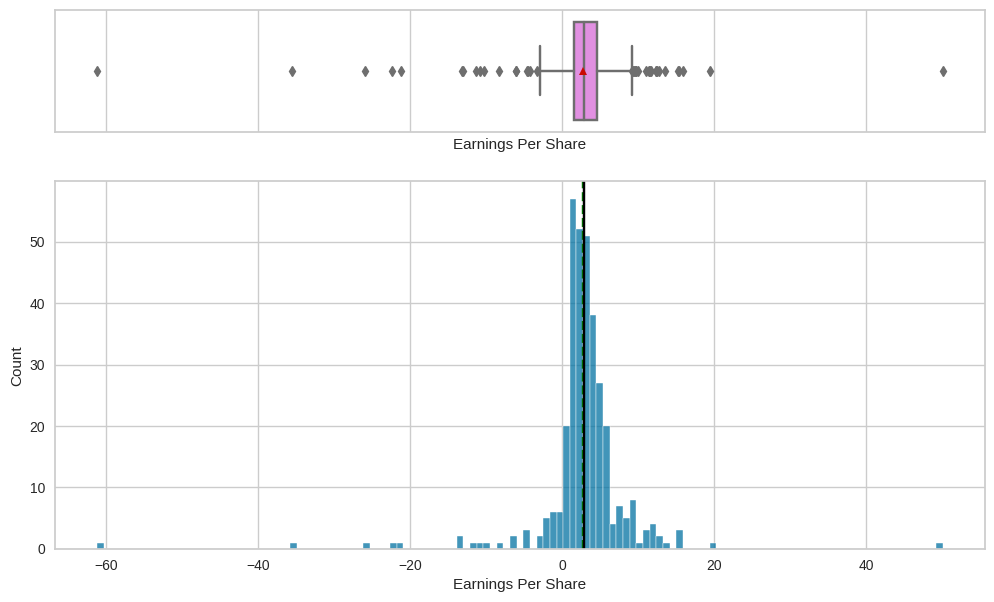

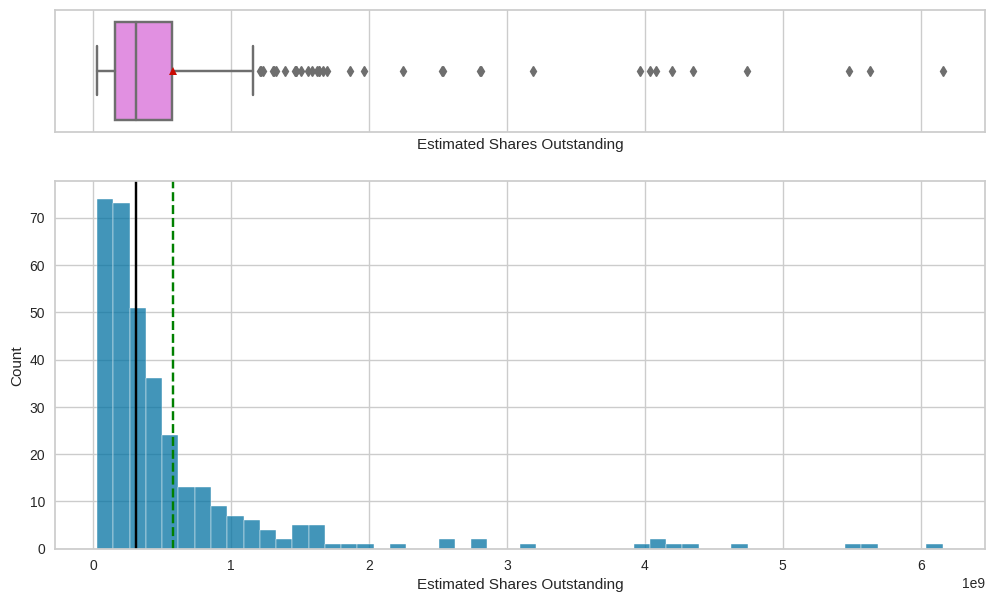

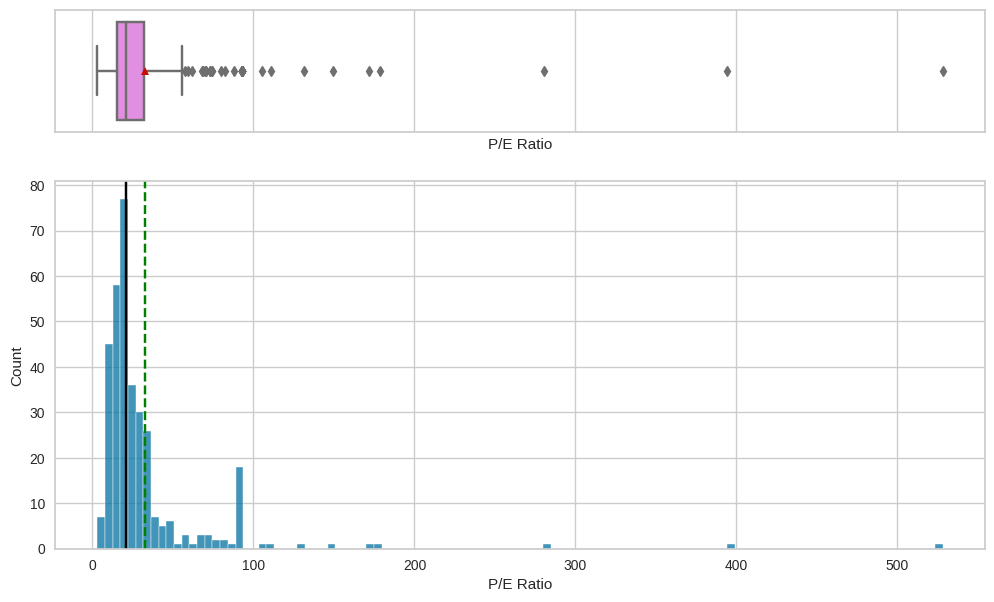

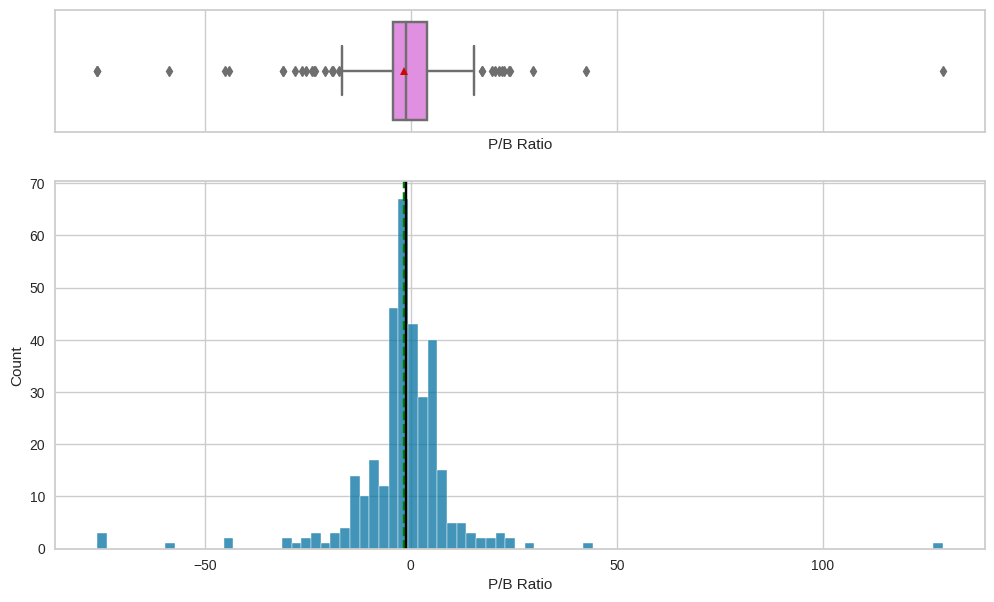

In [ ]:
# now let's run a for loop to make plots of all variables

for x in num_var:
  histogram_boxplot(df,x)

Observations:

- **Current price** is heavily skewed to the right, and most of the values are between $0 and $200.
- **Price change** has similarities to a normal distribution. There are some outliers on both sides around 40%.
- **Volatility** is skewed to the right. Most values are between 0 and 2. There are some outliers from 2.5 and above.
- **ROE** is heavily skewed to the right. Most values are between 0 and 50, and everything above ~50 is considered an outlier.
- Similar to ROE, **Cash Ratio** is heavily skewed to the right and has some outliers with significantly higher values than the rest.
- **Net Cash Flow** aglomerates around 0, and almost everything slightly above or below it is considered an outlier.
- **Net Income** tends to agglomerate around slightly higher than 0, and similar to Net Cash Flow.
- **Earnings Per Share** is slightly skewed towards the left, mostly due to outliers.
- **Estimated Shares Outstanding** is heavily skewed towards the right and values above ~1 are considered outliers.
- **P/E Ratio** is heavily skewed to the right and has big outliers > 200.
- **P/B Ratio** agglomerates around 0. There are some outliers <-50 and 1 >100.


#### Non-numeric variables

##### GICS Sector

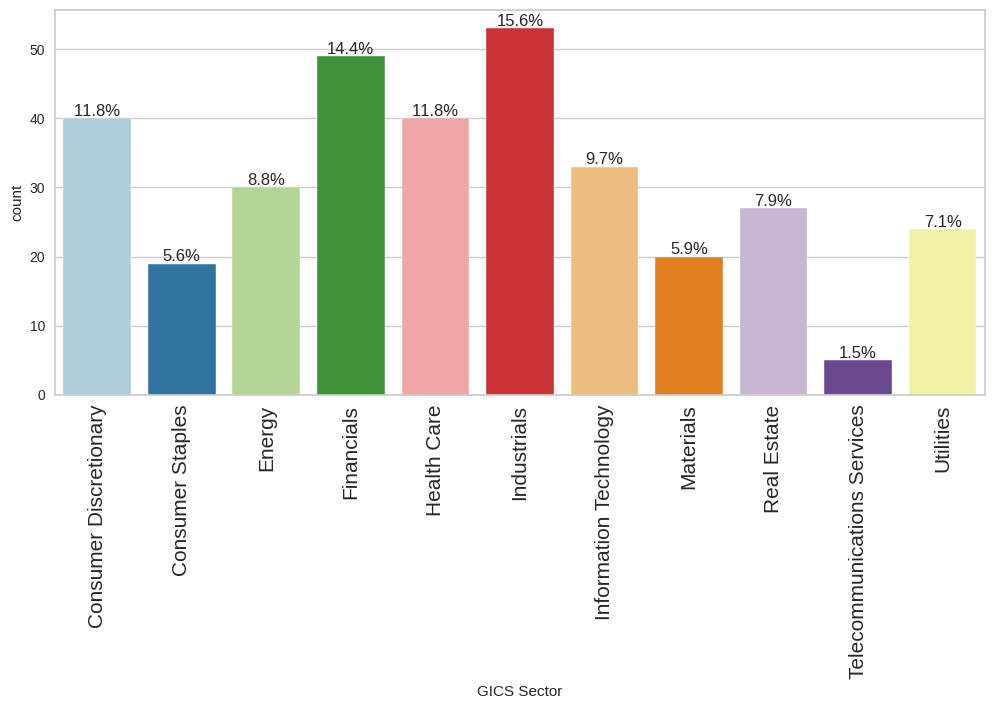

In [ ]:
labeled_barplot(df, 'GICS Sector', perc=True)

- Industrials (15.6%) and Financials (14.4%) have the highest count, followed by Health Care (11.8%) and Consumer Discretionary (11.8%). Telecommunications Services have the lowest count with 1.5%.

##### GICS Sub Industry

In [ ]:
import plotly.express as px

# Let's create an interactive bar plot
fig = px.bar(df['GICS Sub Industry'].value_counts().reset_index(), x='index', y='GICS Sub Industry', labels={'index': 'Category', 'Category': 'Count'})
fig.show()

- 16 companies belong to the sub industry of Oil & Gas Exploration & Production, making it the most frequent.
- Then we have REITs, Industrial Conglomerates, Electric Utilities, Internet Software & Services, Health Care Equipment, MultiUtilities, and Banks with > 10 companies.
- The rest of sub industries have less than 10 companies.

### Bivariate Analysis

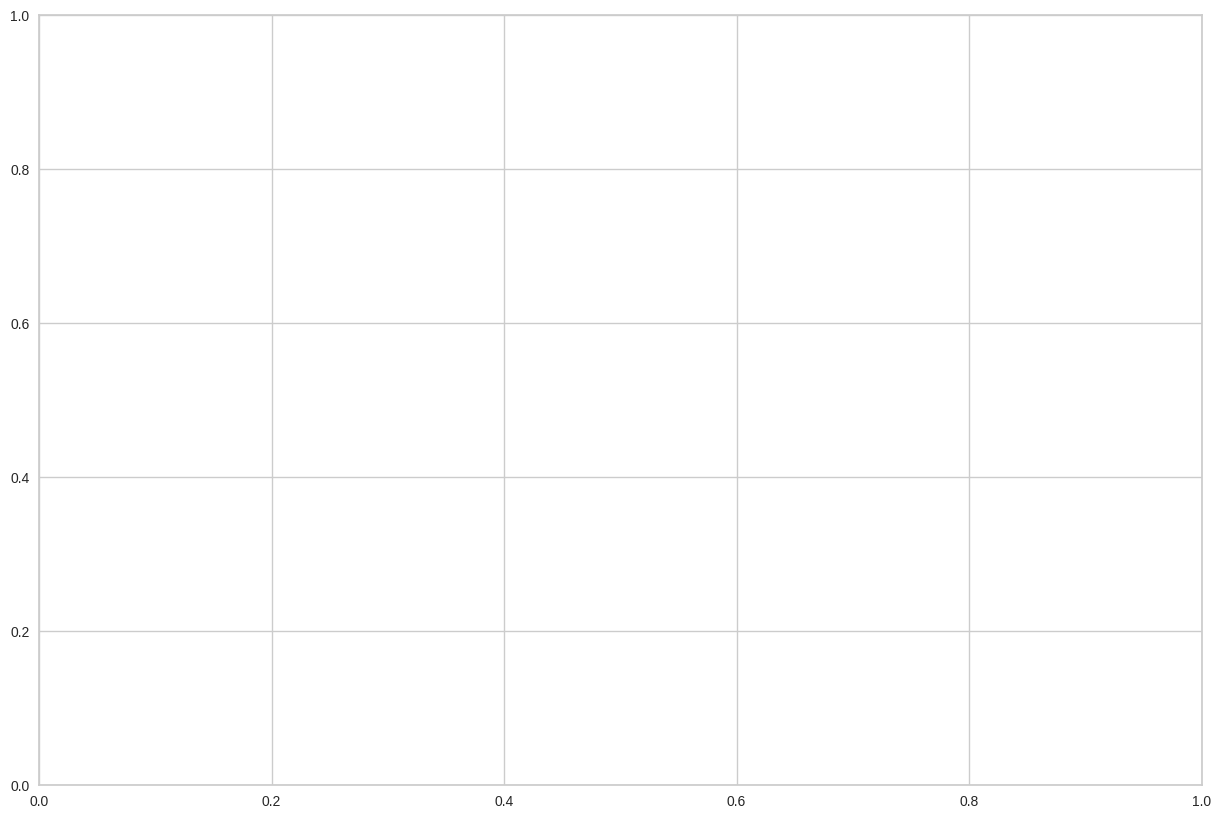

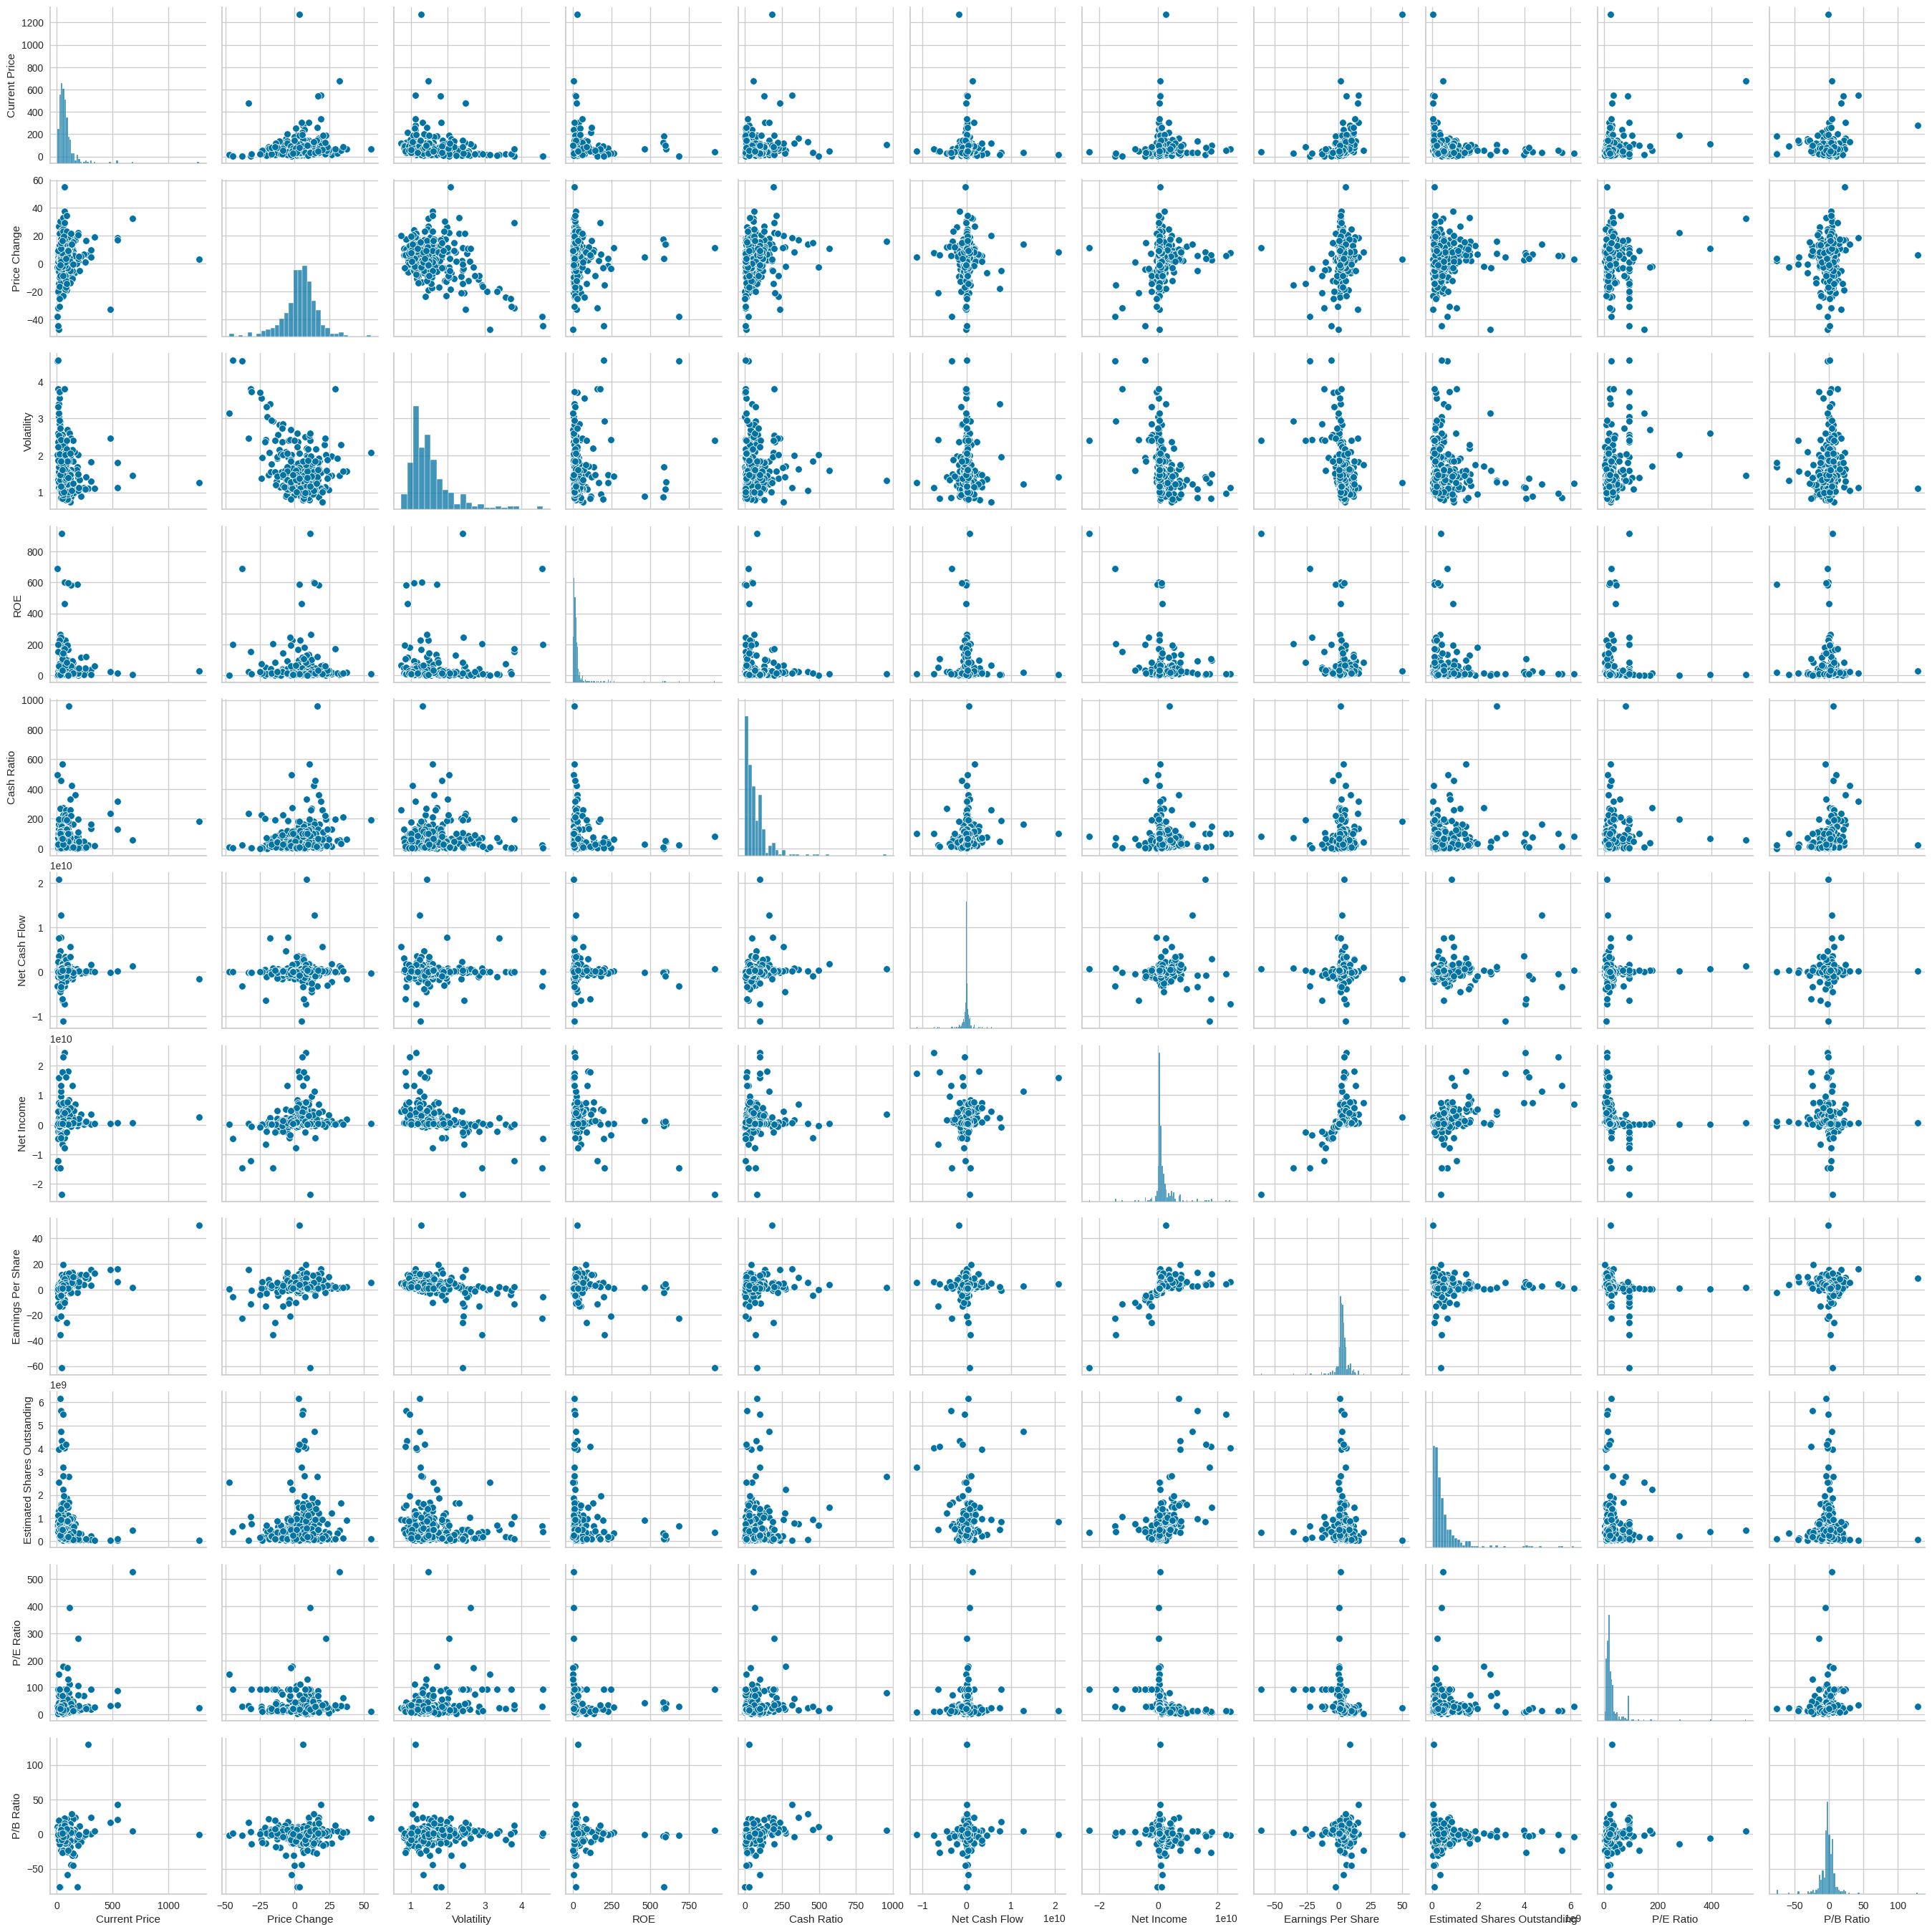

In [ ]:
# Let's build a pairplot to visualize all the numeric variables and their distributions

fig, ax = plt.subplots(figsize=(15, 10))
sns.pairplot(num_var, palette="winter")
plt.show()

- There are no significant visual correlations.

- Overall, most distributions seem different from eachother and there are no clear patterns besides agglomeration towards the mean of certain variables like P/B and P/E ratio, but that's normal. Variables seem relevant for modeling.

#### 1. What does the distribution of stock prices look like?

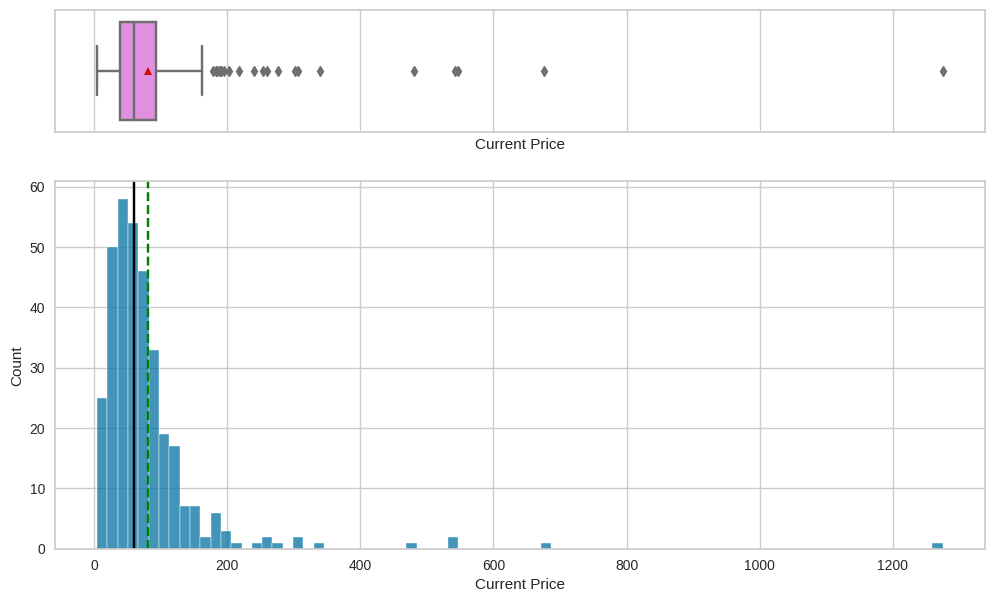

In [ ]:
histogram_boxplot(df, 'Current Price')

- Most stock prices are between 0 dollars and 200 dollars.
- Only a few stocks have a price > $400 dollars.

#### 2. The stocks of which economic sector have seen the maximum price increase on average?

In [ ]:
price_change_by_industry = df.groupby('GICS Sector')['Price Change'].mean()
print(price_change_by_industry)

GICS Sector
Consumer Discretionary          5.846093
Consumer Staples                8.684750
Energy                        -10.228289
Financials                      3.865406
Health Care                     9.585652
Industrials                     2.833127
Information Technology          7.217476
Materials                       5.589738
Real Estate                     6.205548
Telecommunications Services     6.956980
Utilities                       0.803657
Name: Price Change, dtype: float64


- The sectors with the max avg price increase were Health Care, Consumer Staples, and Information Technology.

#### 3. How are the different variables correlated with each other?

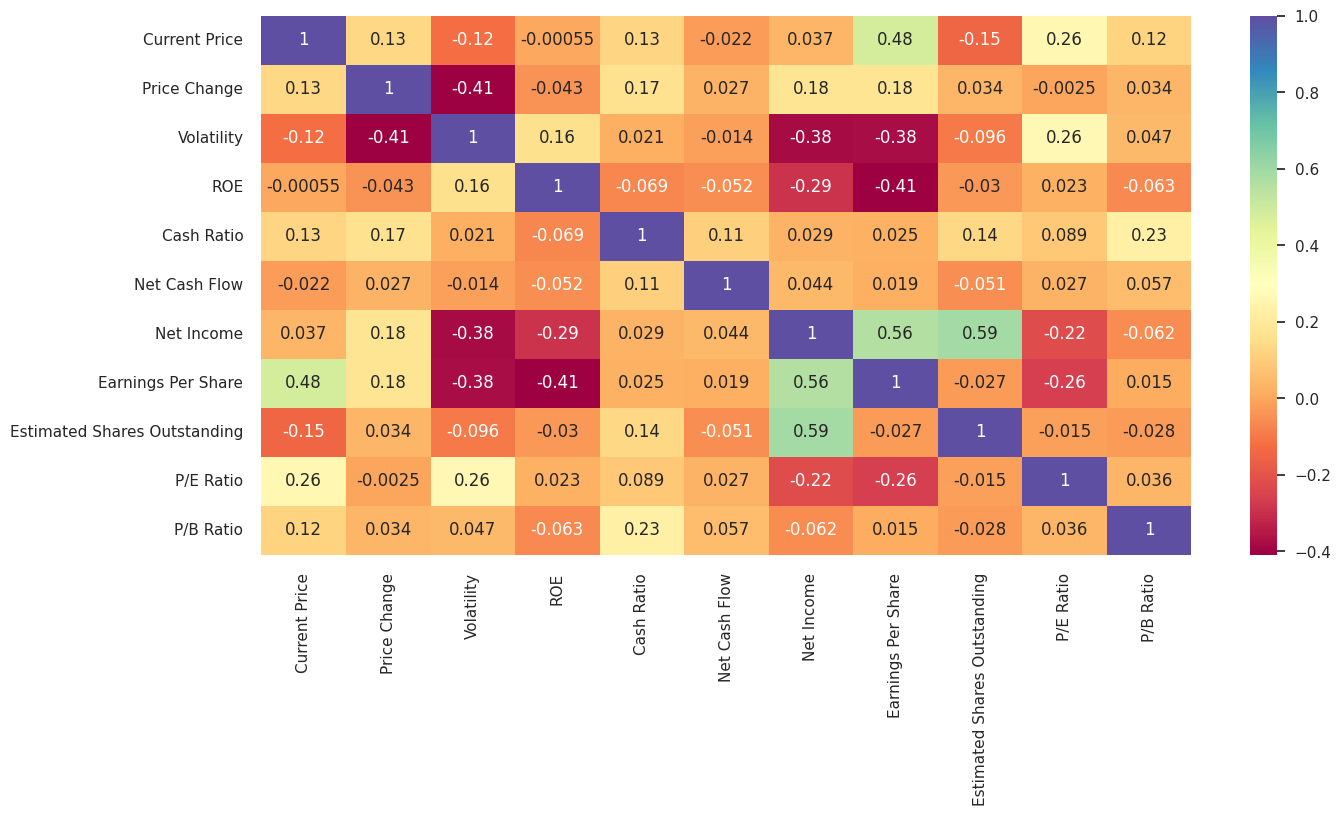

In [ ]:
plt.figure(figsize=(15,7))
sns.heatmap(num_var.corr(), annot=True, cmap='Spectral')
plt.show()

- Net income and volatility are negatively correlated (-0.38), same value as earnings per share and volatility.
- Earnings per share is negatively correlated to ROE (-0.41). Makes sense since ROE refers to the ability of the company to convert equity finance into profit.

#### 4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?


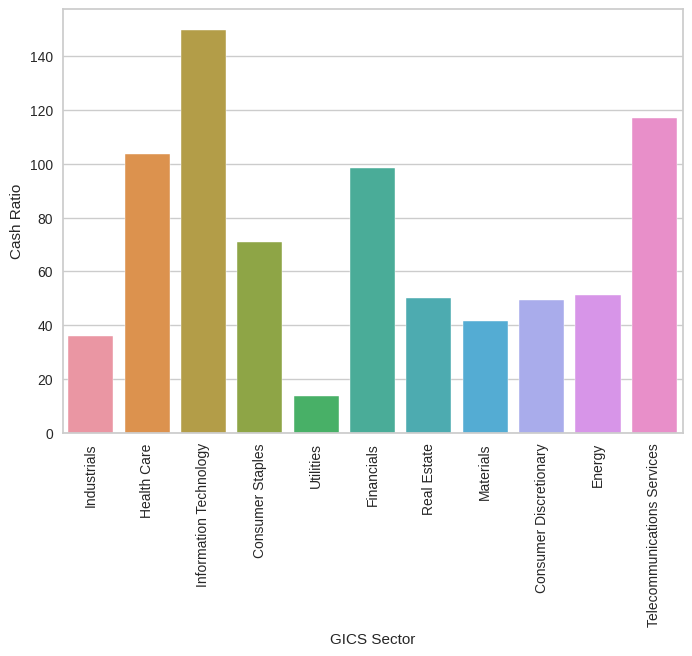

In [ ]:
sns.barplot(data=df, x='GICS Sector', y='Cash Ratio', ci=False)
plt.xticks(rotation=90)
plt.show()

- Information Technology, Telecommunications Services, Health Care, and Financials have the highest average Cash Ratio.
- On the contrary, Utilities have the lowest average.

#### 5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?

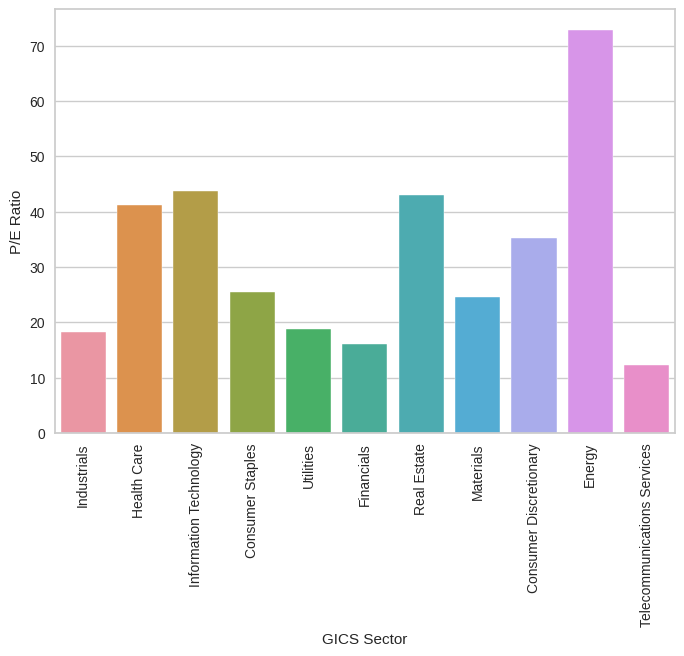

In [ ]:
sns.barplot(data=df, x='GICS Sector', y='P/E Ratio', ci=False)
plt.xticks(rotation=90)
plt.show()

- Energy has the highest average P/E Ratio. Followed by Information Technology, Health Care, and Real Estate.
- Financials, Telecommunication Services, Utilities, and Industrials have the lowest average ratio.

#### P/B Ratio vs Sector

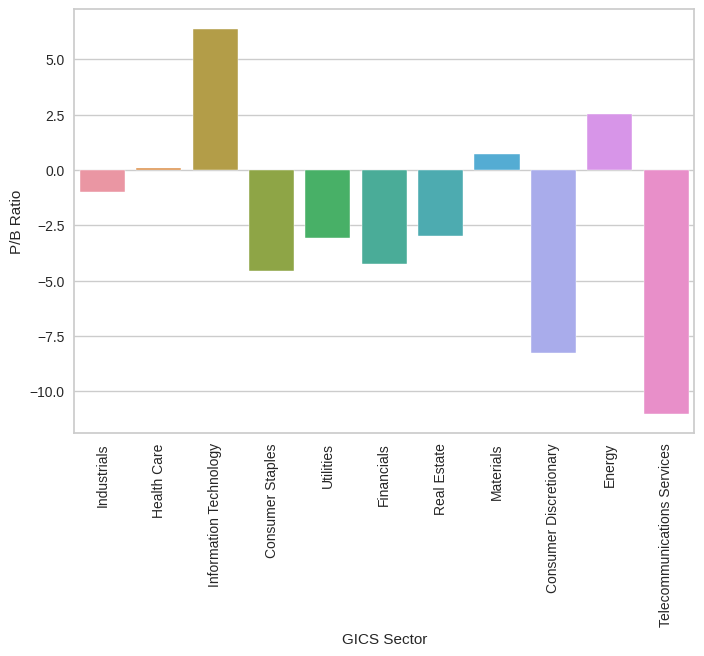

In [ ]:
sns.barplot(data=df, x='GICS Sector', y='P/B Ratio', ci=False)
plt.xticks(rotation=90)
plt.show()

- Sectors with the highest average P/B Ratio are Information Technology and Energy. Meaning the stock is being traded over the value of its assets. Some may say these sectors are overpriced.
- Telecommunications Services and Consumer Discretionary have the lowest ratios, meaning they are being traded below the value if its assets.

#### Volatility vs Sector

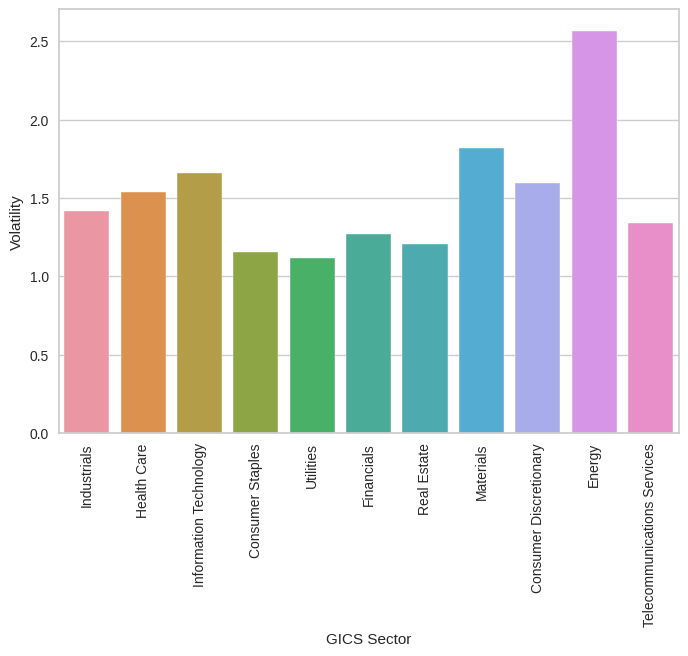

In [ ]:
sns.barplot(data=df, x='GICS Sector', y='Volatility', ci=False)
plt.xticks(rotation=90)
plt.show()

- Most sectors have the same average volatility, but some that have it slightly higher are Energy and Materials.

## Data Preprocessing

### Outlier check

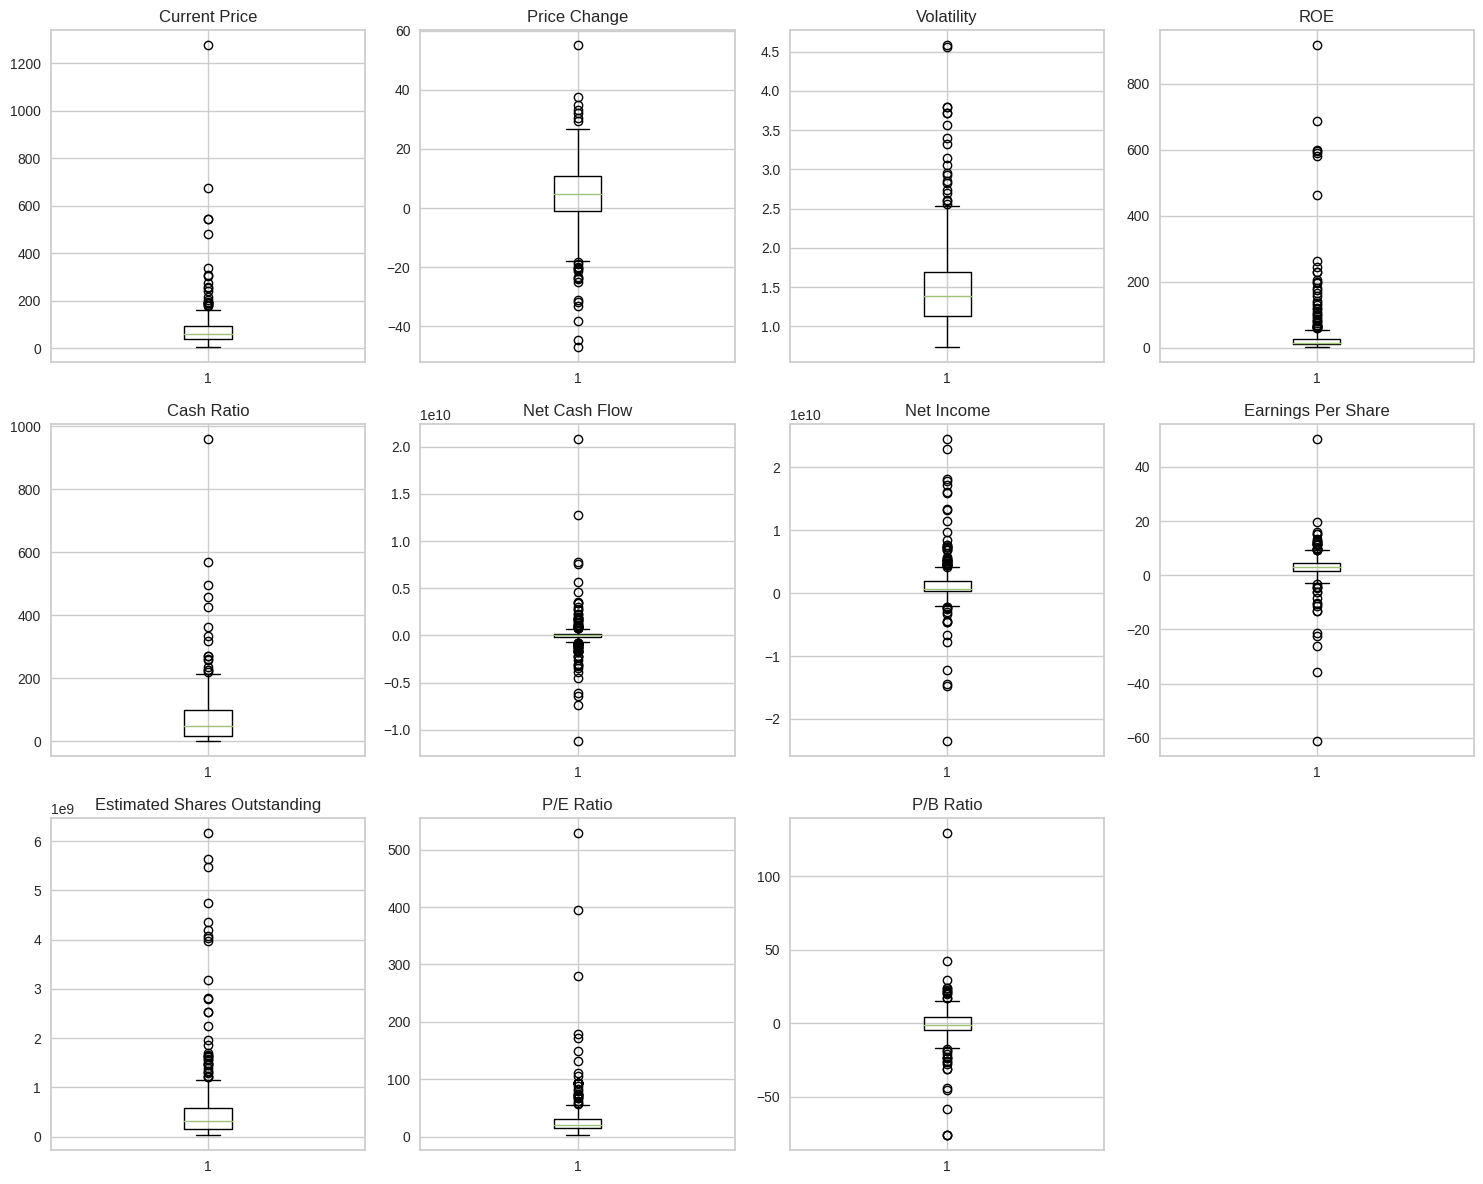

In [ ]:
plt.figure(figsize=(15, 12))

for i, variable in enumerate(num_var):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

- All variables have outliers. However, since there's a lot of variability in the stock market and they seem like proper values, we won't treat them.

### Scaling

In [ ]:
# First let's create a list of all the numeric variables

num_col = ['Current Price',
            'Price Change',
            'Volatility',
            'ROE',
            'Cash Ratio',
            'Net Cash Flow',
            'Net Income',
            'Earnings Per Share',
            'Estimated Shares Outstanding',
            'P/E Ratio',
            'P/B Ratio']

df[num_col].head()

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,42.349998,9.999995,1.687151,135,51,-604000000,7610000000,11.39,6.681299e+08,3.718174,-8.784219
1,59.240002,8.339433,2.197887,130,77,51000000,5144000000,3.15,1.633016e+09,18.806350,-8.750068
2,44.910000,11.301121,1.273646,21,67,938000000,4423000000,2.94,1.504422e+09,15.275510,-0.394171
3,93.940002,13.977195,1.357679,9,180,-240840000,629551000,1.26,4.996437e+08,74.555557,4.199651
4,55.320000,-1.827858,1.701169,14,272,315120000,696878000,0.31,2.247994e+09,178.451613,1.059810


In [ ]:
# We'll scale only the numeric variables

scaler = StandardScaler()
subset = df[num_col].copy()
subset_scaled = scaler.fit_transform(subset)

# Now let's create a dataframe with the scaled data
scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)
scaled_df.head()

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
0,-0.393341,0.493950,0.272749,0.989601,-0.210698,-0.339355,1.554415,1.309399,0.107863,-0.652487,-0.506653
1,-0.220837,0.355439,1.137045,0.937737,0.077269,-0.002335,0.927628,0.056755,1.250274,-0.311769,-0.504205
2,-0.367195,0.602479,-0.427007,-0.192905,-0.033488,0.454058,0.744371,0.024831,1.098021,-0.391502,0.094941
3,0.133567,0.825696,-0.284802,-0.317379,1.218059,-0.152497,-0.219816,-0.230563,-0.091622,0.947148,0.424333
4,-0.260874,-0.492636,0.296470,-0.265515,2.237018,0.133564,-0.202703,-0.374982,1.978399,3.293307,0.199196


## Hierarchical Clustering

### Cophenetic Correlation

In [ ]:
# Let's create a separate scaled data frame just for the hierarchical clustering

scaled_df_hc = scaled_df.copy()

In [ ]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(scaled_df_hc, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(scaled_df_hc))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560814.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.9338265528030499.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.925919553052459.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850002.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159736.
Cophenetic correla

In [ ]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with Euclidean distance and average linkage.


- Chebyshev + average linkage, Cityblock + single linkage, and Cityblock + average linkage also have a good correlation ~0.93.

Now let's compare different linkage methods only with Euclidean Distance

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(scaled_df_hc, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(scaled_df_hc))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560814.
Cophenetic correlation for centroid linkage is 0.9314012446828154.
Cophenetic correlation for ward linkage is 0.7101180299865353.
Cophenetic correlation for weighted linkage is 0.8693784298129404.


In [ ]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.9422540609560814, which is obtained with average linkage.


- Again, **Euclidian + Average linkage has the highest correlation**. Single linkage and centroid linkage are just behind.

### Dendrograms

We'll create and compare dendrograms using different linkage methods and only the euclidean distance.

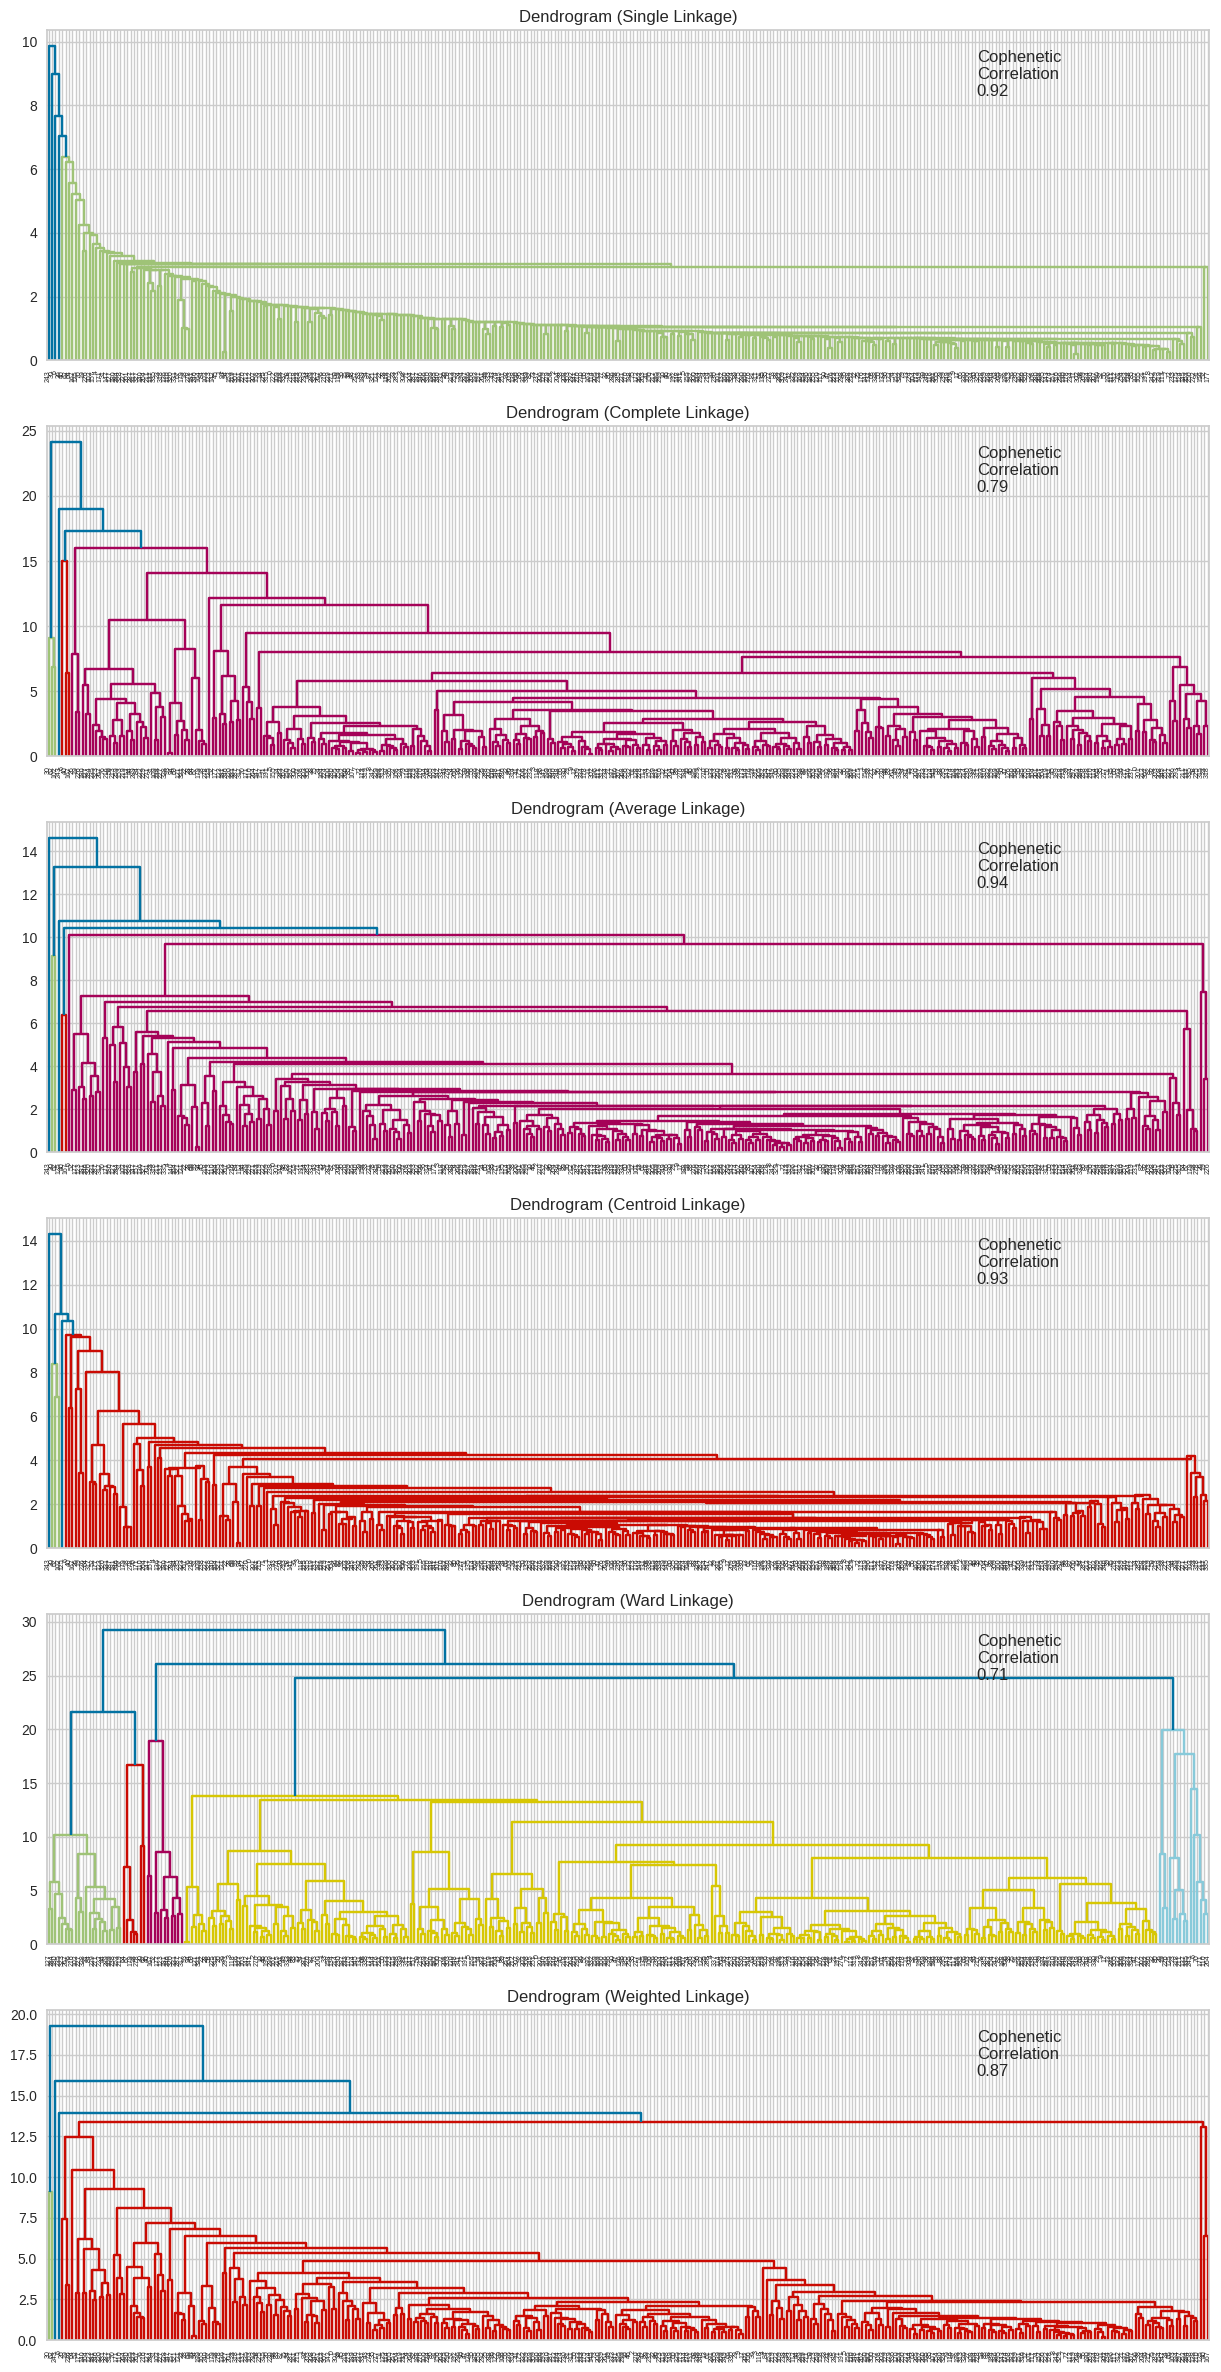

In [ ]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(scaled_df_hc, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(scaled_df_hc))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

- Avergae and Centroid have the highest correlations.
- 7 seems to be the appropiate number of clusters based on the average dendrogram. But from Ward linkage that provides the most differentiation of clusters, 5 seems to be the appropiate number.

- For now we'll proceed with Average Linkage.

### Creating Hierarchical Model: euclidean + average linkage

In [ ]:
HCmodel = AgglomerativeClustering(n_clusters=7, affinity="euclidean", linkage="average")
HCmodel.fit(scaled_df_hc)

AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=7)

In [ ]:
# Let's add the cluster labels to the hierarchical clustering scaled data frame, and a copy of the original data frame

# scaled hc df
scaled_df_hc["HC_Clusters"] = HCmodel.labels_

# copy of original df
df_hc = df.copy()
df_hc['HC_Clusters'] = HCmodel.labels_

### Cluster Profiling

In [ ]:
# Let's create a data frame of all the clusters and the respective means of the numeric variables
cluster_profile_hc = df_hc.groupby("HC_Clusters").mean()
cluster_profile_hc

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio
HC_Clusters,,,,,,,,,,,
0,24.485001,-13.351992,3.482611,802.000000,51.000000,-1.292500e+09,-1.910650e+10,-41.815000,5.195740e+08,60.748608,1.565141
1,25.640000,11.237908,1.322355,12.500000,130.500000,1.675550e+10,1.365400e+10,3.295000,2.791829e+09,13.649696,1.508484
2,327.006671,21.917380,2.029752,4.000000,106.000000,6.982407e+08,2.875470e+08,0.750000,3.667632e+08,400.989188,-5.322376
3,104.660004,16.224320,1.320606,8.000000,958.000000,5.920000e+08,3.669000e+09,1.310000,2.800763e+09,79.893133,5.884467
4,1274.949951,3.190527,1.268340,29.000000,184.000000,-1.671386e+09,2.551360e+09,50.090000,5.093552e+07,25.453183,-1.052429
5,276.570007,6.189286,1.116976,30.000000,25.000000,9.088500e+07,5.965410e+08,8.910000,6.695185e+07,31.040405,129.064585
6,75.017416,3.937751,1.513415,35.621212,66.545455,-3.984676e+07,1.549443e+09,2.904682,5.622663e+08,29.091275,-2.146308


In [ ]:
# Now we add a new 'count' column with the number of stocks in each cluster
cluster_profile_hc["count_in_each_segments"] = (
    df_hc.groupby("HC_Clusters")["Security"].count().values
)

In [ ]:
# Highlighting the maximum average with purple
cluster_profile_hc.style.highlight_max(color="purple", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segments
HC_Clusters,,,,,,,,,,,,
0,24.485001,-13.351992,3.482611,802.000000,51.000000,-1292500000.000000,-19106500000.000000,-41.815000,519573983.250000,60.748608,1.565141,2
1,25.640000,11.237908,1.322355,12.500000,130.500000,16755500000.000000,13654000000.000000,3.295000,2791829362.100000,13.649696,1.508484,2
2,327.006671,21.917380,2.029752,4.000000,106.000000,698240666.666667,287547000.000000,0.750000,366763235.300000,400.989188,-5.322376,3
3,104.660004,16.224320,1.320606,8.000000,958.000000,592000000.000000,3669000000.000000,1.310000,2800763359.000000,79.893133,5.884467,1
4,1274.949951,3.190527,1.268340,29.000000,184.000000,-1671386000.000000,2551360000.000000,50.090000,50935516.070000,25.453183,-1.052429,1
5,276.570007,6.189286,1.116976,30.000000,25.000000,90885000.000000,596541000.000000,8.910000,66951851.850000,31.040405,129.064585,1
6,75.017416,3.937751,1.513415,35.621212,66.545455,-39846757.575758,1549443100.000000,2.904682,562266326.402576,29.091275,-2.146308,330


In [ ]:
# let's see the names of the countries in each cluster
for cl in df_hc["HC_Clusters"].unique():
    print("In cluster {}, the following countries are present:".format(cl))
    print(df_hc[df_hc["HC_Clusters"] == cl]["Security"].unique())
    print()

In cluster 6, the following countries are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Amgen Inc' 'Ameriprise Financial' 'American Tower Corp A'
 'AutoNation Inc' 'Anthem Inc.' 'Aon plc' 'Anadarko Petroleum Corp'
 'Amphenol Corp' 'Arconic Inc' 'Activision Blizzard'
 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'Baker Hughes Inc' 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.'
 'Ball Corp' 'Bristol-Myers Squibb' 'Boston Scient

- **Cluster 6 has 340/350 companies. There's almost no variety. Although euclidean + average linkage had the highest cophenetic correlation, the end result is not practical.**

- **Let's try Ward linkage that generated clusters with more variety.**

### Final Model Building: Euclidean + Ward

In [ ]:
# First we'll build the model using the euclidean distance and ward linkage with K = 4

HCmodel = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="ward")
HCmodel.fit(scaled_df_hc)

# scaled hc df
scaled_df_hc["HC_Clusters"] = HCmodel.labels_

# copy of original df
df_hc['HC_Clusters'] = HCmodel.labels_

# Grouping by mean
cluster_profile_hc = df_hc.groupby("HC_Clusters").mean()

# Adding count
cluster_profile_hc["count_in_each_segments"] = (
    df_hc.groupby("HC_Clusters")["Security"].count().values
)

# Highlighting the maximum average with purple
cluster_profile_hc.style.highlight_max(color="purple", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segments
HC_Clusters,,,,,,,,,,,,
0,74.162501,-8.152437,2.537700,178.500000,46.437500,-383950875.000000,-3233045437.500000,-7.804688,475111396.795000,105.662011,-2.458849,32
1,325.996105,7.724708,1.545762,17.000000,360.333333,186503166.666667,1008736416.666667,9.544167,589434517.801667,41.121871,25.258283,12
2,42.848182,6.270446,1.123547,22.727273,71.454545,558636363.636364,14631272727.272728,3.410000,4242572567.290909,15.242169,-4.924615,11
3,72.760400,5.213307,1.427078,25.603509,60.392982,79951512.280702,1538594322.807018,3.655351,446472132.228456,24.722670,-2.647194,285


- These clusters have much more variety among them.
- The cophenetic correlation of 0.71 is good.
- 4 seems to be the sweet spot. We also tested K=2, 3, 5, 6 and 7. However, the biggest cluster did not change significantly among the different Ks, and most of the change ocurred on the other smaller clusters. For that reason we selected 4 as it is the sweet spot of variety and interpretability.

**Final Hierarchical Model: K = 4 with Euclidean distance and Ward Linkage.**

Let's plot boxplots to compare the clusters with the scaled data:

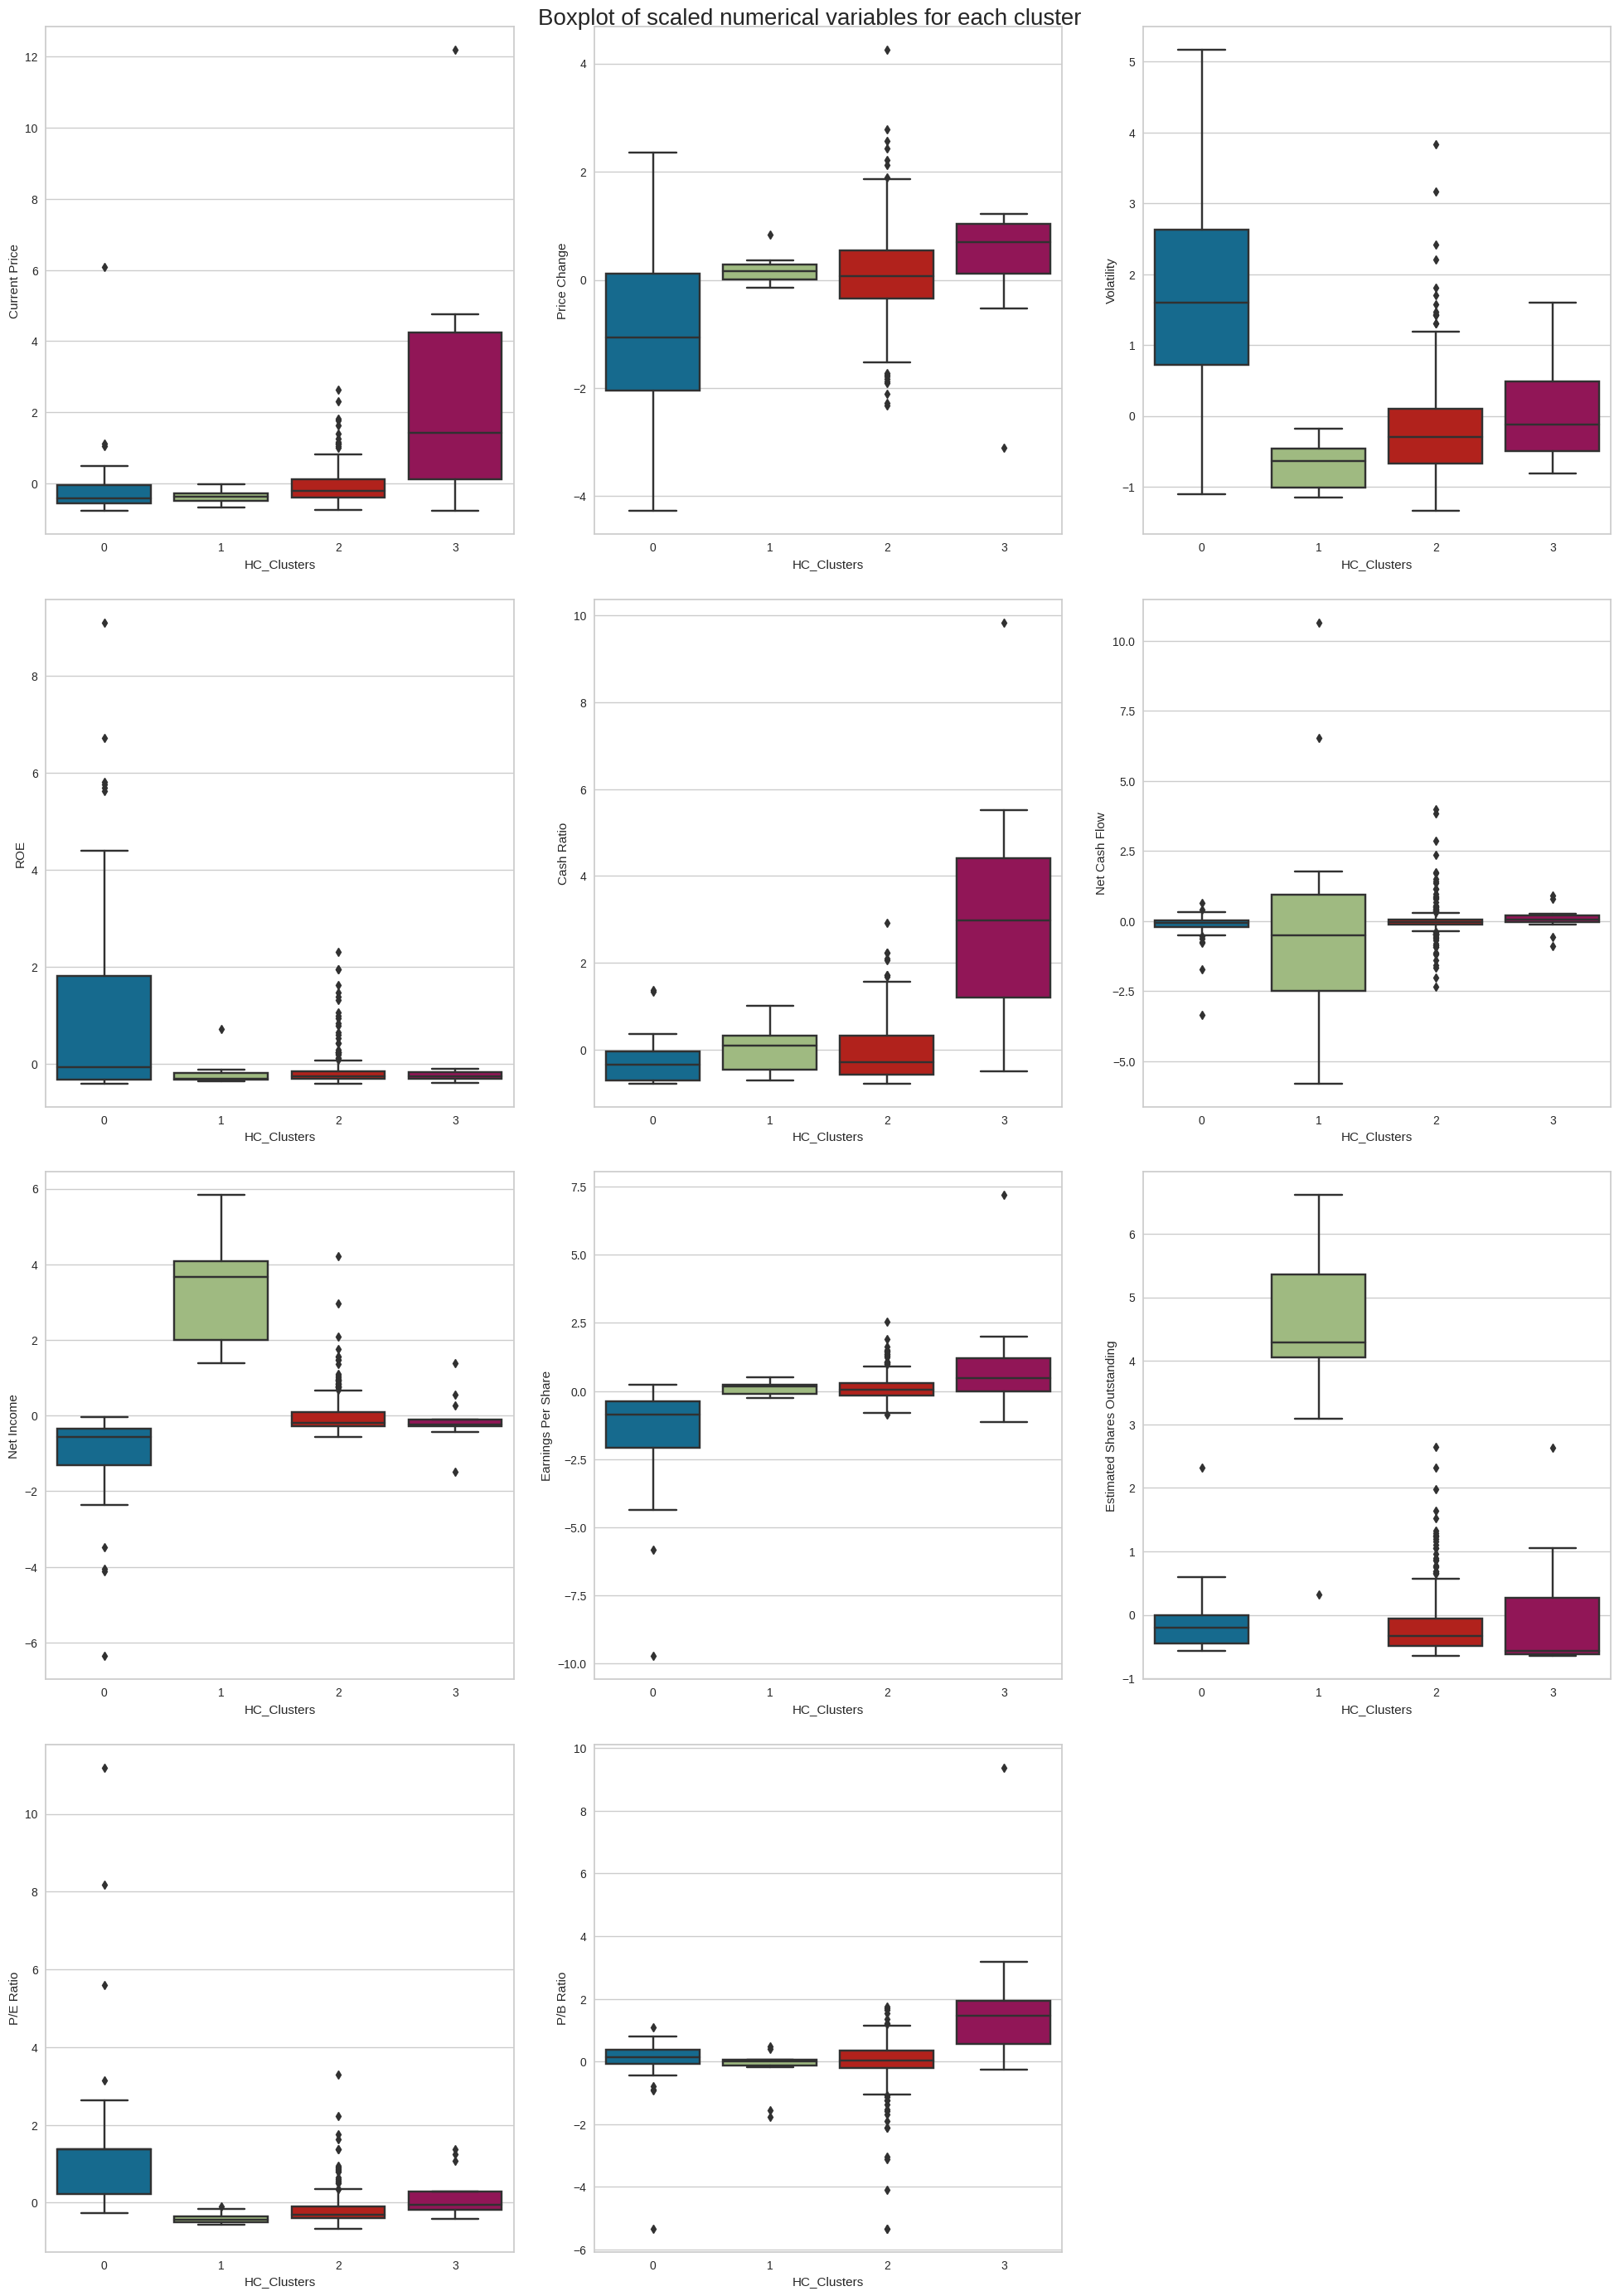

In [ ]:
plt.figure(figsize=(20, 35))
plt.suptitle("Boxplot of scaled numerical variables for each cluster", fontsize=20)

for i, variable in enumerate(num_col):
    plt.subplot(5, 3, i + 1)
    sns.boxplot(data=scaled_df_hc, x="HC_Clusters", y=variable)

plt.tight_layout(pad=2.0)

Boxplots to compare clusters with the original data:

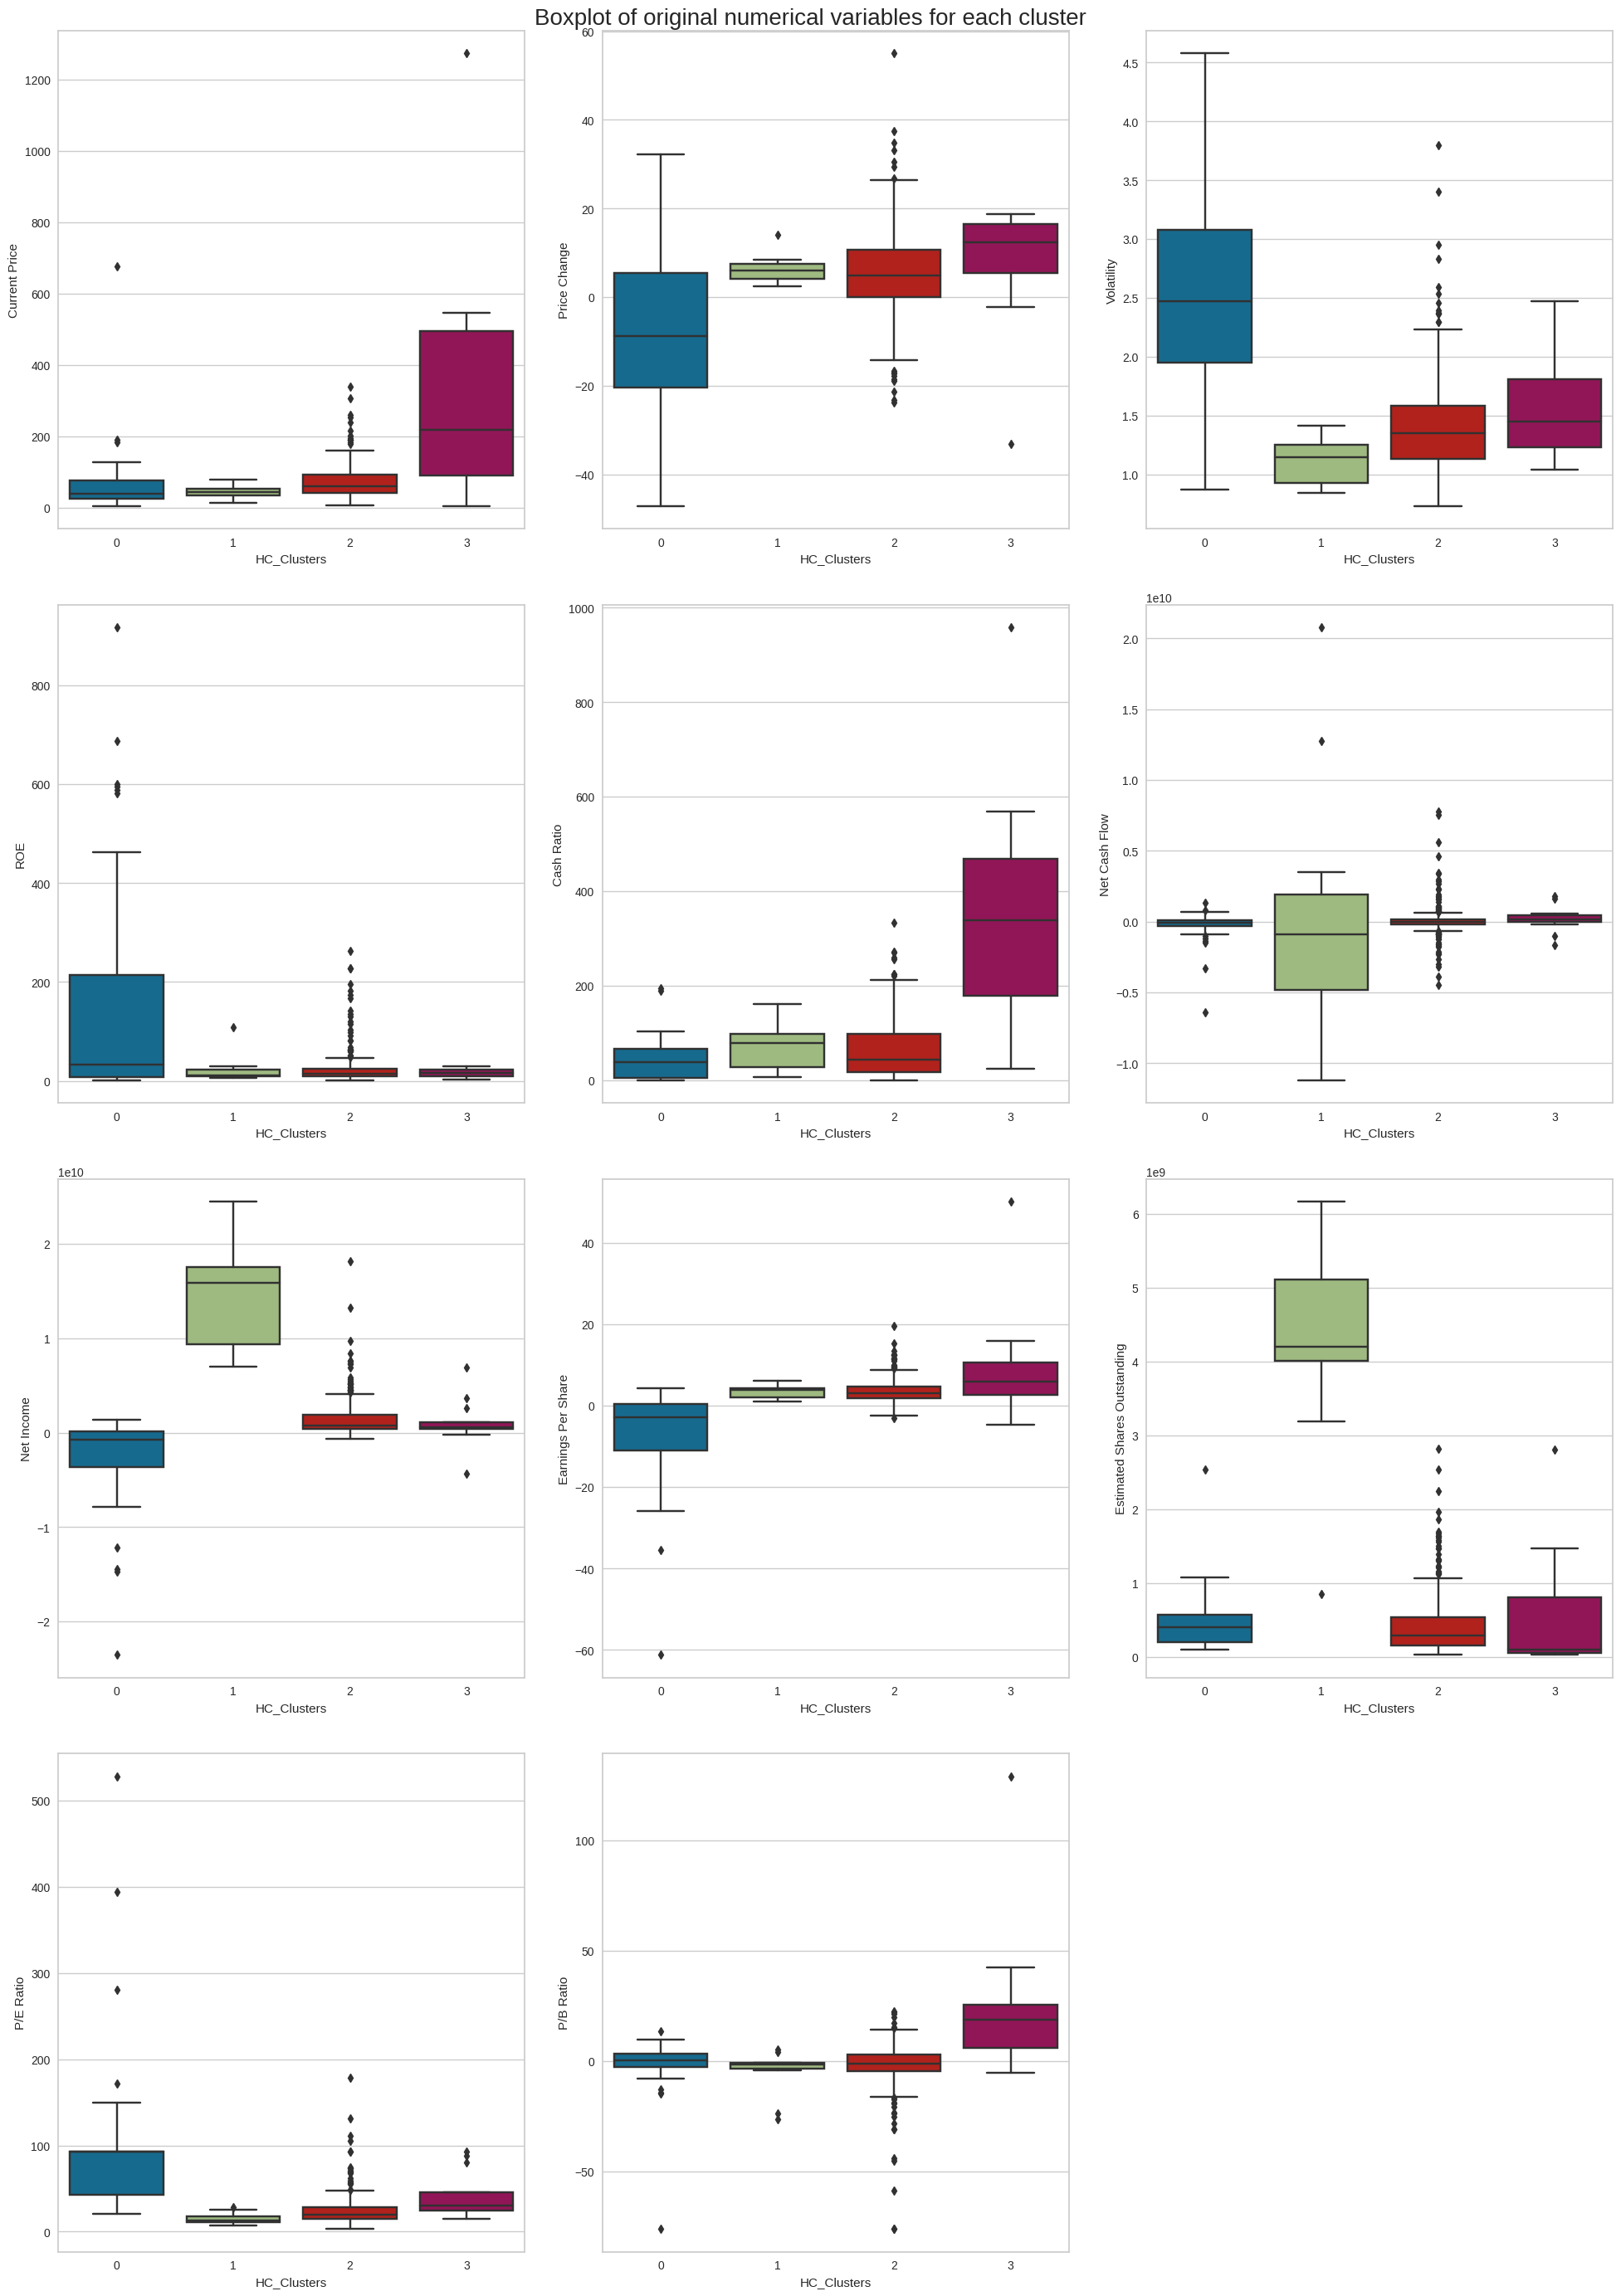

In [ ]:
plt.figure(figsize=(20, 35))
plt.suptitle("Boxplot of original numerical variables for each cluster", fontsize=20)

for i, variable in enumerate(num_col):
    plt.subplot(5, 3, i + 1)
    sns.boxplot(data=df_hc, x="HC_Clusters", y=variable)

plt.tight_layout(pad=2.0)

### Insights:

***Cluster 3: Average Investments***
- 285 Companies. These do not excel at any metric in particular. Most outstanding is that the P/B ratio is low, and therefore the companies still have room to grow. Net cash flow, net income, and earnings per share are average. These are generally good investments, but don't expect amazing returns or appreciations.

***Cluster 2: Smart Bet***
- 11 Companies. These have the highest net income, net cash flow, and estimated shares outstanding. Also have the lowest P/B ratio. The rest is average. These are good investments overall. Are not overpriced, have room to grow, generate decent earnings and have below average volatility.

***Cluster 0: The Big Short***
- 32 companies in this cluster. Had the biggest price decrease, high volatility, low earnings per share, the highest P/E ratio, and the lowest net income and net cash flow. Overall pretty bad on most metrics.

- These companies are VERY risky, but also rewarding. Price could go either way, therefore experienced investors should go for these aiming for drastic price changes either buying or shorting the stock.

***Cluster 1: Big and Safe***

- 12 companies. These have the highest avg current price ($325.9), price change (7.7%), cash ratio (360.3), earnigns per share (9.5), and P/B Ratio (25.3). Volatility and P/E ratio are close to general average, net cash flow and net income are on the lower end.
- These are 'big' companies that are already well stablished, with a high cash ratio and high earnings per share, but have a high P/B ratio, meaning the company trades for over the value of its assets. These are the 'safe' or boring stocks that provide high earnings at a high cost and won't move much.

## K-means Clustering

### Elbow plot

In [ ]:
# Let's create a separate scaled data frame just for the K-means clustering

scaled_df_km = scaled_df.copy()

Number of Clusters: 1 	Average Distortion: 2.5425069919221697
Number of Clusters: 2 	Average Distortion: 2.382318498894466
Number of Clusters: 3 	Average Distortion: 2.2692367155390745
Number of Clusters: 4 	Average Distortion: 2.1745559827866363
Number of Clusters: 5 	Average Distortion: 2.128799332840716
Number of Clusters: 6 	Average Distortion: 2.080400099226289
Number of Clusters: 7 	Average Distortion: 2.0289794220177395
Number of Clusters: 8 	Average Distortion: 1.964144163389972
Number of Clusters: 9 	Average Distortion: 1.9221492045198068
Number of Clusters: 10 	Average Distortion: 1.8513913649973124
Number of Clusters: 11 	Average Distortion: 1.8024134734578485
Number of Clusters: 12 	Average Distortion: 1.7900931879652673
Number of Clusters: 13 	Average Distortion: 1.7417609203336912
Number of Clusters: 14 	Average Distortion: 1.673559857259703


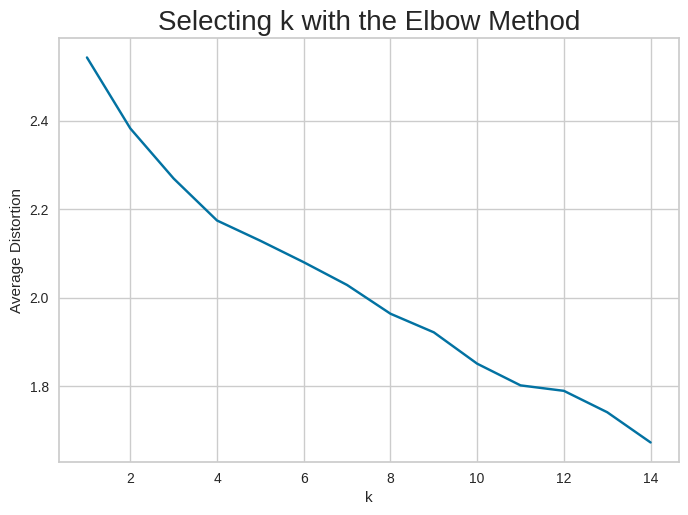

In [ ]:
# Now let's build the elbow plot with the distortions of all Ks from 1 to 14

clusters = range(1, 15)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(scaled_df)
    prediction = model.predict(scaled_df_km)
    distortion = (
        sum(np.min(cdist(scaled_df_km, model.cluster_centers_, "euclidean"), axis=1))
        / scaled_df_km.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

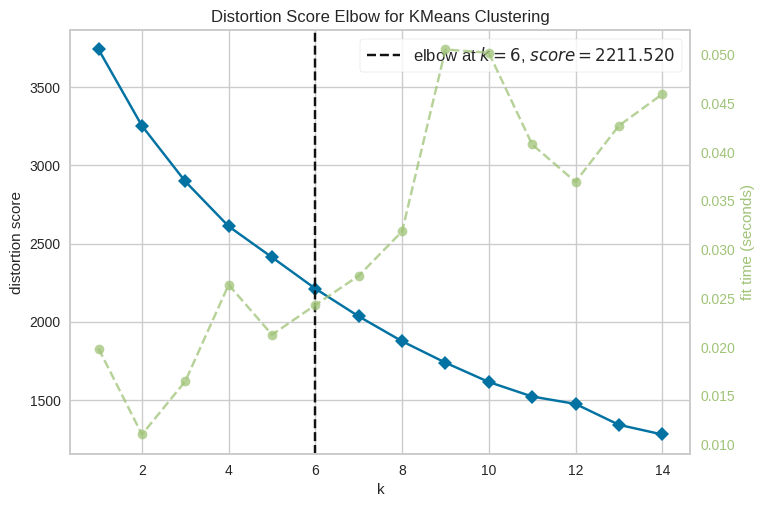

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(1, 15), timings=True)
visualizer.fit(scaled_df_km)
visualizer.show()

- Based on both graphs, K seems to be between 4 and 6.


### Silhouette scores

For n_clusters = 2, the silhouette score is 0.43969639509980457)
For n_clusters = 3, the silhouette score is 0.4644405674779404)
For n_clusters = 4, the silhouette score is 0.4577225970476733)
For n_clusters = 5, the silhouette score is 0.43228336443659804)
For n_clusters = 6, the silhouette score is 0.4005422737213617)
For n_clusters = 7, the silhouette score is 0.3976335364987305)
For n_clusters = 8, the silhouette score is 0.40278401969450467)
For n_clusters = 9, the silhouette score is 0.3778585981433699)
For n_clusters = 10, the silhouette score is 0.13458938329968687)
For n_clusters = 11, the silhouette score is 0.1421832155528444)
For n_clusters = 12, the silhouette score is 0.2044669621527429)
For n_clusters = 13, the silhouette score is 0.23424874810104204)
For n_clusters = 14, the silhouette score is 0.12102526472829901)


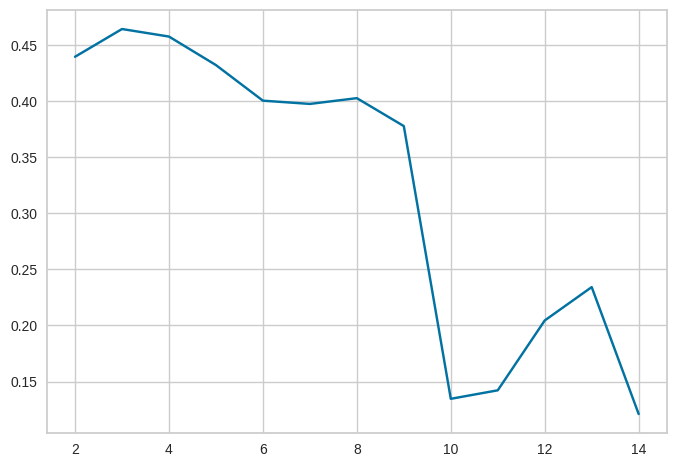

In [ ]:
# Let's calculate the silhouette scores of all Ks from 2 to 14.

sil_score = []
cluster_list = range(2, 15)
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((scaled_df))
    score = silhouette_score(scaled_df_km, preds)
    sil_score.append(score)
    print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

plt.plot(cluster_list, sil_score)
plt.show()

- The highest point is around 3 clusters, but 4 is also close. There's a small decrease towards 6 and then remains almost the same until 8, then drops.

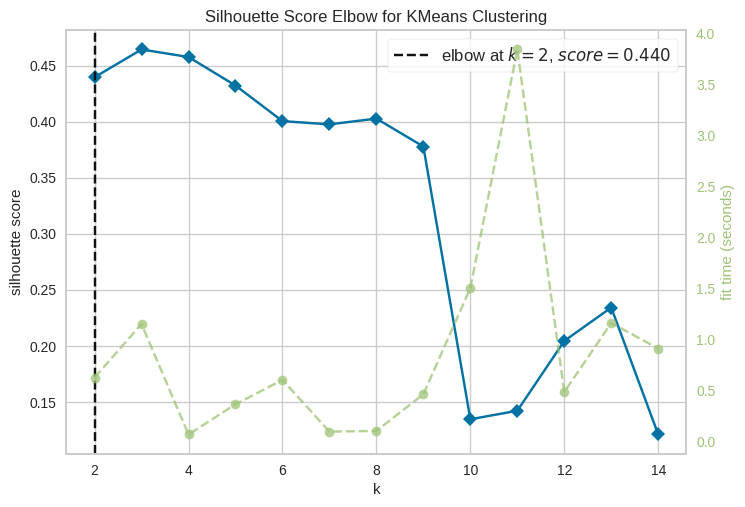

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [ ]:
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 15), metric="silhouette", timings=True)
visualizer.fit(scaled_df_km)
visualizer.show()

- Again, the ideal cluster seems to be between 4 and 6. Let's visualize all 3.

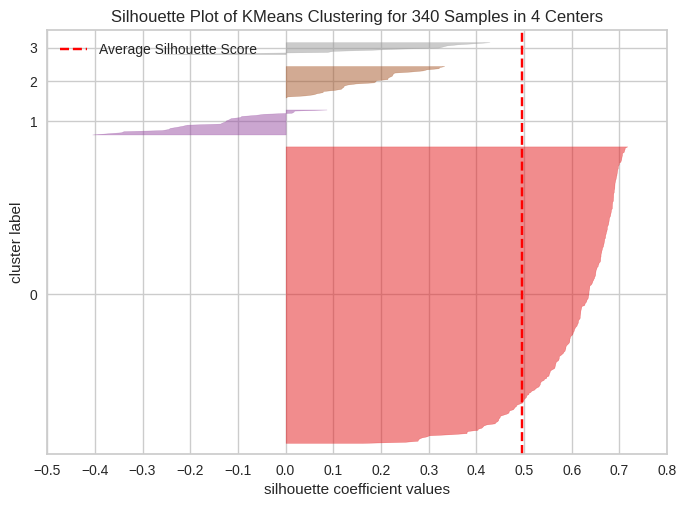

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# Let's build the silhouette plots for Ks equal to 4, 5 and 6
# K = 4
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(scaled_df_km)
visualizer.show()

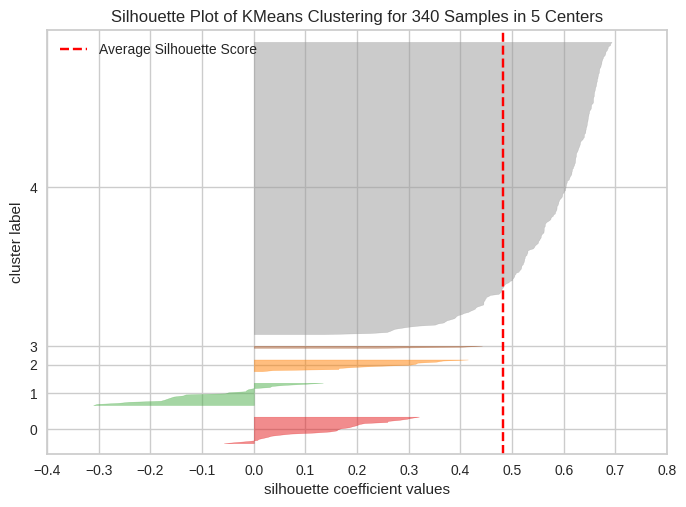

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 5 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# K = 5
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(scaled_df_km)
visualizer.show()

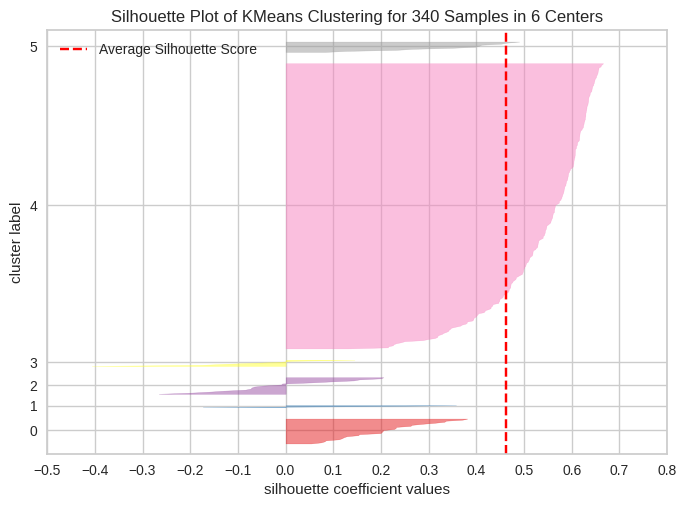

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 340 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [ ]:
# K = 6
visualizer = SilhouetteVisualizer(KMeans(6, random_state=1))
visualizer.fit(scaled_df_km)
visualizer.show()

- With K=4, cluster #3 shows most silhouette scores as negative. #2 and #1 show a few negative scores.
- K=5. Again, Cluster #2 shows most scores as negative and some negatives in #0 and #3.
- K=6. Same as above, mostly negative scores at cluster #2, but fewer on the other clusters.

**Since we could not identify a clear winner, we'll build models for all three Ks.**

### Final Models:

### K = 4

In [ ]:
# Kmeans model with 4 clusters
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(scaled_df_km)

# creating a copy of the original data
df_km = df.copy()

# adding kmeans cluster labels to the original and kmeans scaled dataframes
scaled_df_km["KM_segments"] = kmeans.labels_
df_km["KM_segments"] = kmeans.labels_

# Cluster Profiling
km_cluster_profile = df_km.groupby("KM_segments").mean()

km_cluster_profile["count_in_each_segment"] = (
    df_km.groupby("KM_segments")["Security"].count().values
)

# let's display cluster profiles
km_cluster_profile.style.highlight_max(color="purple", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
KM_segments,,,,,,,,,,,,
0,38.099260,-15.370329,2.910500,107.074074,50.037037,-159428481.481481,-3887457740.740741,-9.473704,480398572.845926,90.619220,1.342067,27
1,50.517273,5.747586,1.130399,31.090909,75.909091,-1072272727.272727,14833090909.090910,4.154545,4298826628.727273,14.803577,-4.552119,11
2,72.399112,5.066225,1.388319,34.620939,53.000000,-14046223.826715,1482212389.891697,3.621029,438533835.667184,23.843656,-3.358948,277
3,234.170932,13.400685,1.729989,25.600000,277.640000,1554926560.000000,1572611680.000000,6.045200,578316318.948800,74.960824,14.402452,25


### K = 5

In [ ]:
# Kmeans model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=1)
kmeans.fit(scaled_df_km)

# adding kmeans cluster labels to the original and kmeans scaled dataframes
scaled_df_km["KM_segments"] = kmeans.labels_
df_km["KM_segments"] = kmeans.labels_

# Cluster Profiling
km_cluster_profile = df_km.groupby("KM_segments").mean()

km_cluster_profile["count_in_each_segment"] = (
    df_km.groupby("KM_segments")["Security"].count().values
)

# let's display cluster profiles
km_cluster_profile.style.highlight_max(color="purple", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
KM_segments,,,,,,,,,,,,
0,35.165385,-16.390175,2.922214,110.961538,49.461538,-192318884.615385,-4041692307.692307,-9.849231,482610056.416923,78.934814,1.612922,26
1,225.945603,12.362269,1.743078,28.545455,299.500000,759552909.090909,1031240545.454545,6.590455,587974943.437273,47.839183,16.875739,22
2,47.710000,5.972014,1.154423,29.000000,77.833333,747416666.666667,14921000000.000000,4.156667,4011013535.683333,14.653677,-4.250943,12
3,327.006671,21.917380,2.029752,4.000000,106.000000,698240666.666667,287547000.000000,0.750000,366763235.300000,400.989188,-5.322376,3
4,72.399112,5.066225,1.388319,34.620939,53.000000,-14046223.826715,1482212389.891697,3.621029,438533835.667184,23.843656,-3.358948,277


### K = 6

In [ ]:
# Kmeans model with 6 clusters
kmeans = KMeans(n_clusters=6, random_state=1)
kmeans.fit(scaled_df_km)

# adding kmeans cluster labels to the original and kmeans scaled dataframes
scaled_df_km["KM_segments"] = kmeans.labels_
df_km["KM_segments"] = kmeans.labels_

# Cluster Profiling
km_cluster_profile = df_km.groupby("KM_segments").mean()

km_cluster_profile["count_in_each_segment"] = (
    df_km.groupby("KM_segments")["Security"].count().values
)

# let's display cluster profiles
km_cluster_profile.style.highlight_max(color="purple", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
KM_segments,,,,,,,,,,,,
0,72.399112,5.066225,1.388319,34.620939,53.000000,-14046223.826715,1482212389.891697,3.621029,438533835.667184,23.843656,-3.358948,277
1,225.945603,12.362269,1.743078,28.545455,299.500000,759552909.090909,1031240545.454545,6.590455,587974943.437273,47.839183,16.875739,22
2,35.165385,-16.390175,2.922214,110.961538,49.461538,-192318884.615385,-4041692307.692307,-9.849231,482610056.416923,78.934814,1.612922,26
3,327.006671,21.917380,2.029752,4.000000,106.000000,698240666.666667,287547000.000000,0.750000,366763235.300000,400.989188,-5.322376,3
4,52.124000,4.918836,1.120837,32.300000,67.300000,-2454200000.000000,15174400000.000000,4.329000,4254850370.400000,14.854474,-5.402829,10
5,25.640000,11.237908,1.322355,12.500000,130.500000,16755500000.000000,13654000000.000000,3.295000,2791829362.100000,13.649696,1.508484,2


### Insights

- Basically, the 'big' cluster of ~277 companies remains the same with all the tested Ks. The difference is how the remaining companies are distributed among the different number of clusters.

- **5 clusters seems to be the right number of clusters**; there's a slight angle change in the elbow curve, the silhouette score is high enough and very close to K=4, the clusters have variety, and there are not too many clusters that could difficult the interpretation and explanation to investors.

### Final Model: K = 5

In [ ]:
# Kmeans model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=1)
kmeans.fit(scaled_df_km)

# adding kmeans cluster labels to the original and kmeans scaled dataframes
scaled_df_km["KM_segments"] = kmeans.labels_
df_km["KM_segments"] = kmeans.labels_

# Cluster Profiling
km_cluster_profile = df_km.groupby("KM_segments").mean()

km_cluster_profile["count_in_each_segment"] = (
    df_km.groupby("KM_segments")["Security"].count().values
)

# let's display cluster profiles
km_cluster_profile.style.highlight_max(color="purple", axis=0)

,Current Price,Price Change,Volatility,ROE,Cash Ratio,Net Cash Flow,Net Income,Earnings Per Share,Estimated Shares Outstanding,P/E Ratio,P/B Ratio,count_in_each_segment
KM_segments,,,,,,,,,,,,
0,50.709167,5.854572,1.142737,29.333333,75.416667,-892666666.666667,13967166666.666666,3.940000,4174873776.750000,16.355810,-4.529687,12
1,72.607396,5.185022,1.381248,34.810909,53.243636,61419985.454545,1530263389.090909,3.645618,430811349.853855,23.606642,-3.383090,275
2,250.793621,12.916516,1.653750,20.000000,288.869565,791793000.000000,1010087043.478261,6.305217,587463127.522609,79.355046,15.143634,23
3,26.990000,-14.060688,3.296307,603.000000,57.333333,-585000000.000000,-17555666666.666668,-39.726667,481910081.666667,71.528835,1.638633,3
4,39.571482,-13.498065,2.864846,47.000000,53.518519,-138960888.888889,-1885284037.037037,-4.874074,468912819.538518,87.423066,1.751179,27


In [ ]:
for cl in df_km["KM_segments"].unique():
    print("In cluster {}, the following companies are present:".format(cl))
    print(df_km[df_km["KM_segments"] == cl]["Security"].unique())
    print()

In cluster 1, the following companies are present:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Archer-Daniels-Midland Co' 'Ameren Corp'
 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp' 'Allegion'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Bank of America Corp' 'Baxter International Inc.' 'BB&T Corporation'
 'Bard (C.R.) Inc.' 'The Bank of New York Mellon Corp.' 'Ball Corp'
 'Bristol-Myers Squibb' 'Boston Scientific' 'BorgWarner'
 'Boston Properties' 'Caterpillar Inc.' 'Chubb Limited' 'C

In [ ]:
df_km.groupby(["KM_segments", "GICS Sector"])['Security'].count()

KM_segments  GICS Sector                
0            Consumer Discretionary          1
             Consumer Staples                1
             Energy                          1
             Financials                      3
             Health Care                     3
             Information Technology          1
             Telecommunications Services     2
1            Consumer Discretionary         33
             Consumer Staples               17
             Energy                          5
             Financials                     46
             Health Care                    28
             Industrials                    52
             Information Technology         24
             Materials                      18
             Real Estate                    26
             Telecommunications Services     2
             Utilities                      24
2            Consumer Discretionary          5
             Consumer Staples                1
             Energy

Boxplots using original data:

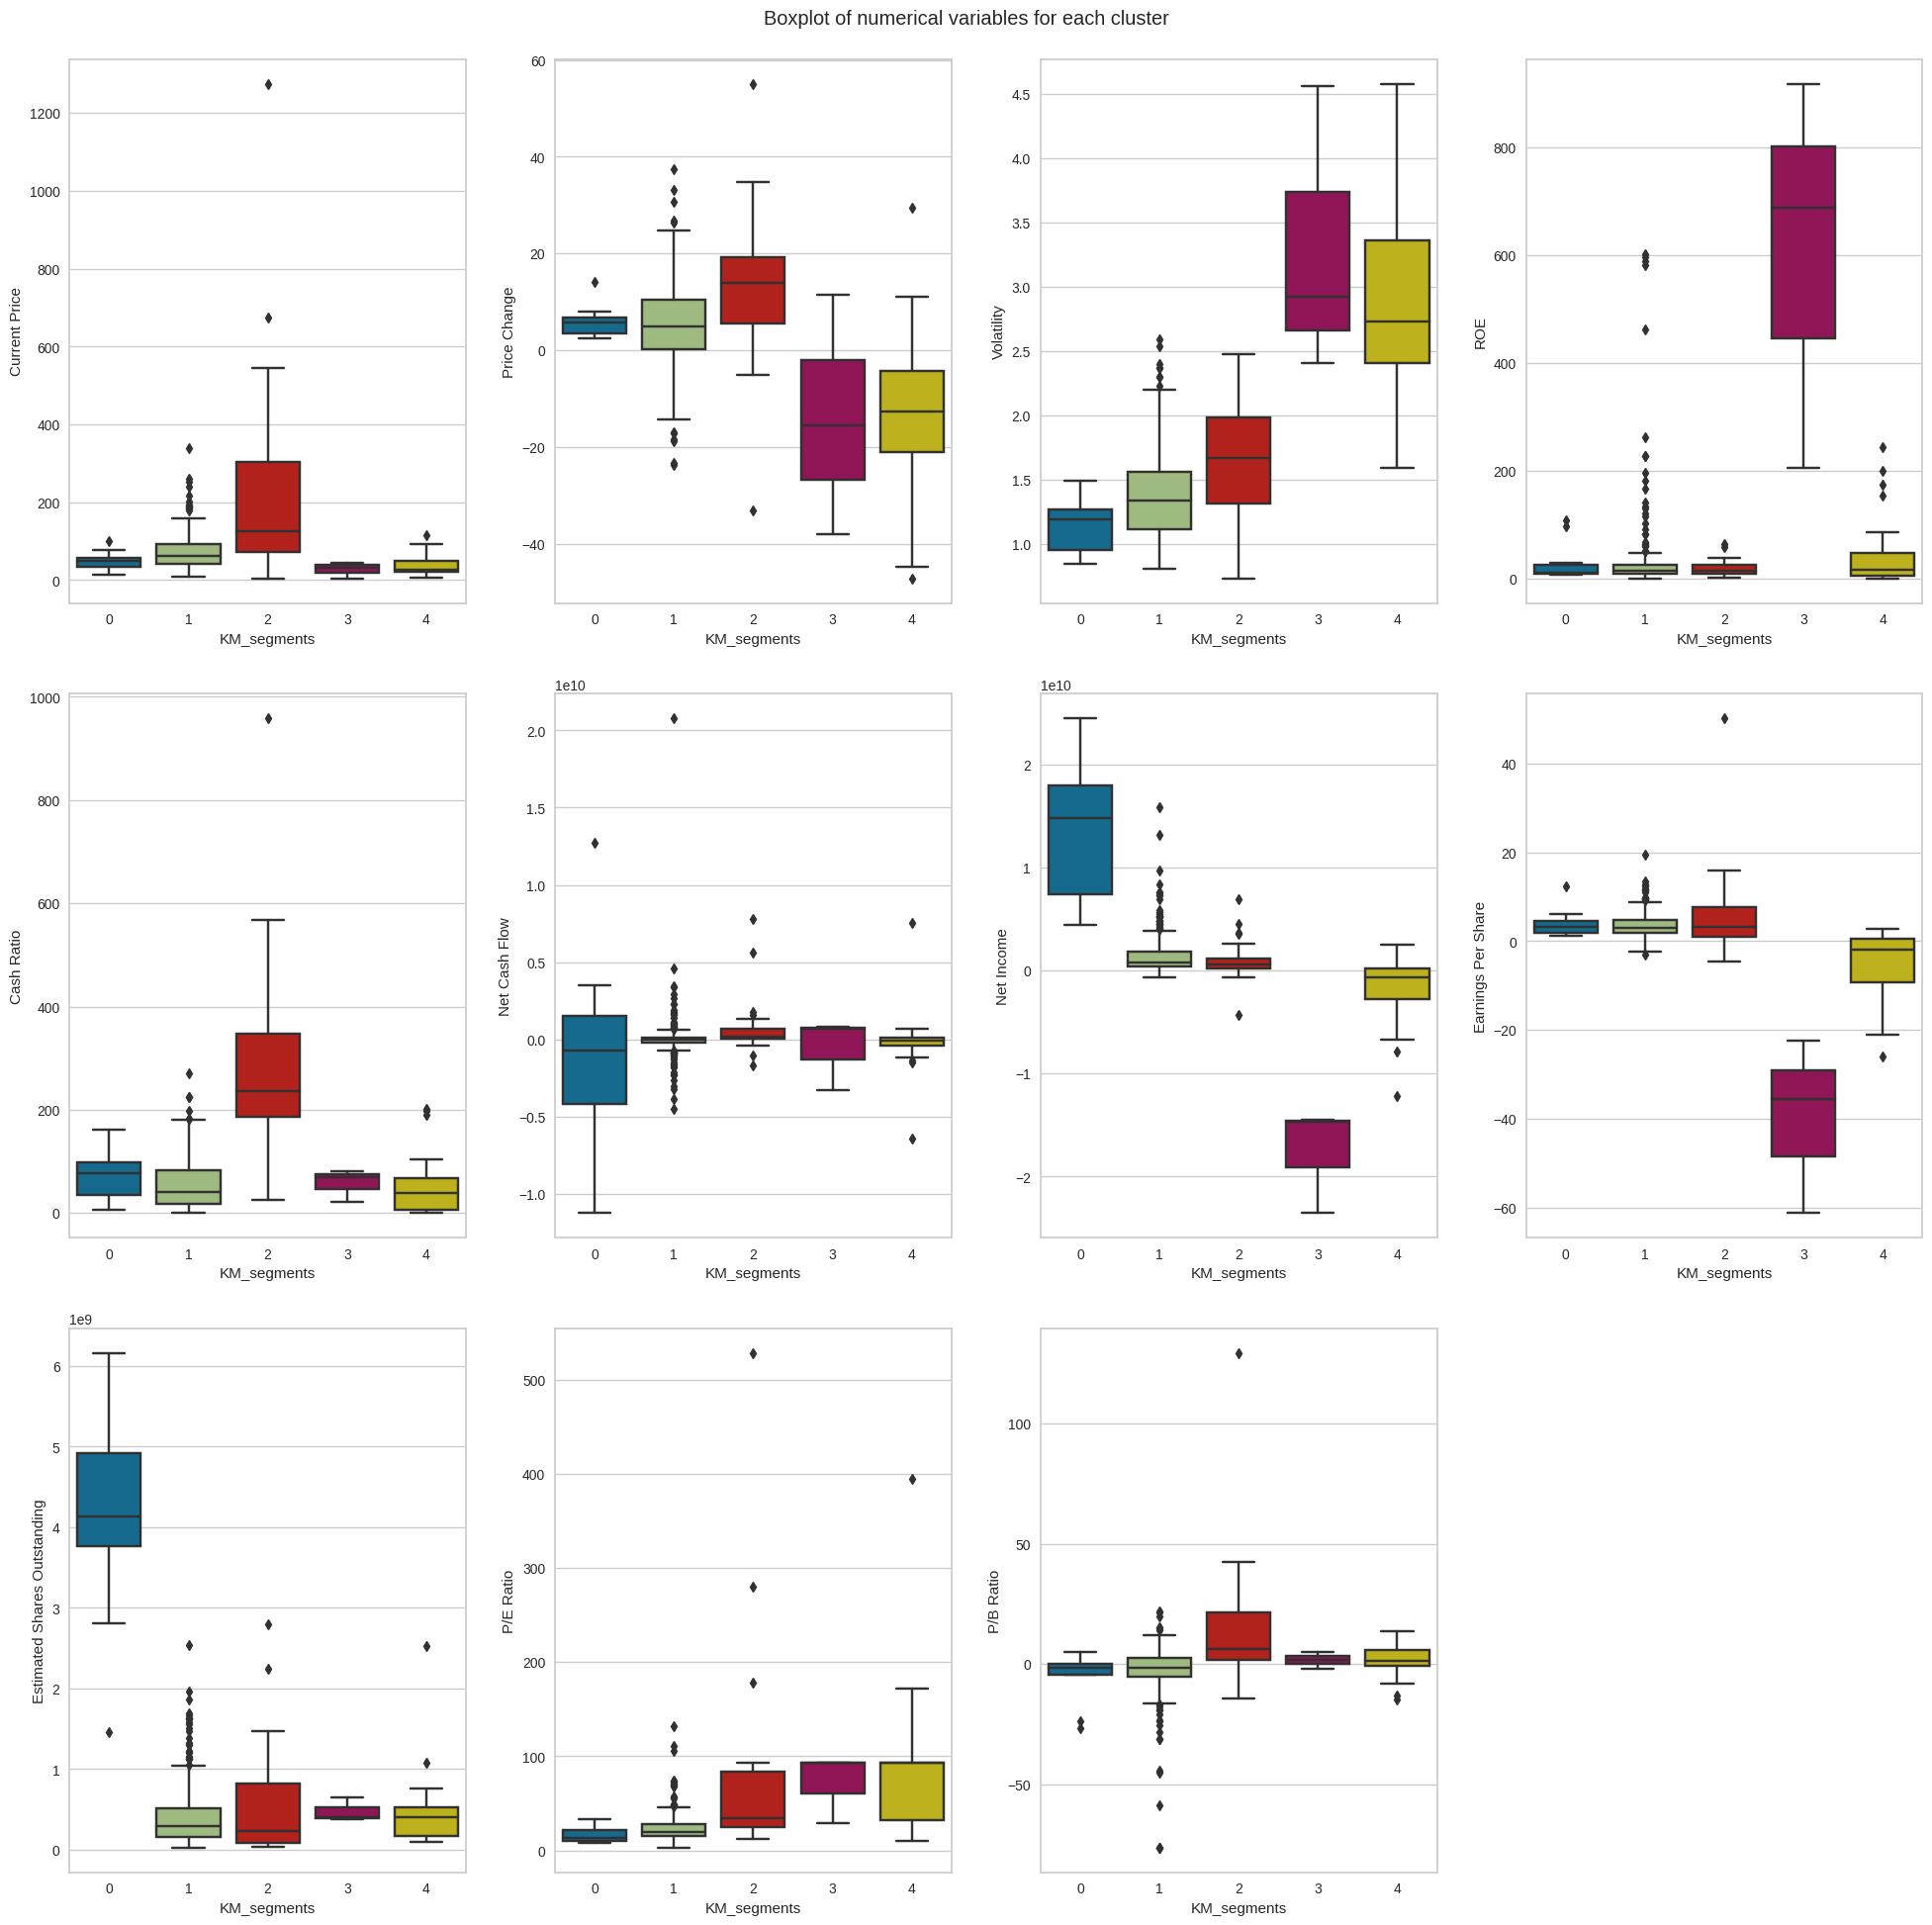

In [ ]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=df_km, x="KM_segments", y=variable)

plt.tight_layout(pad=2.0)

Boxplots using scaled data:

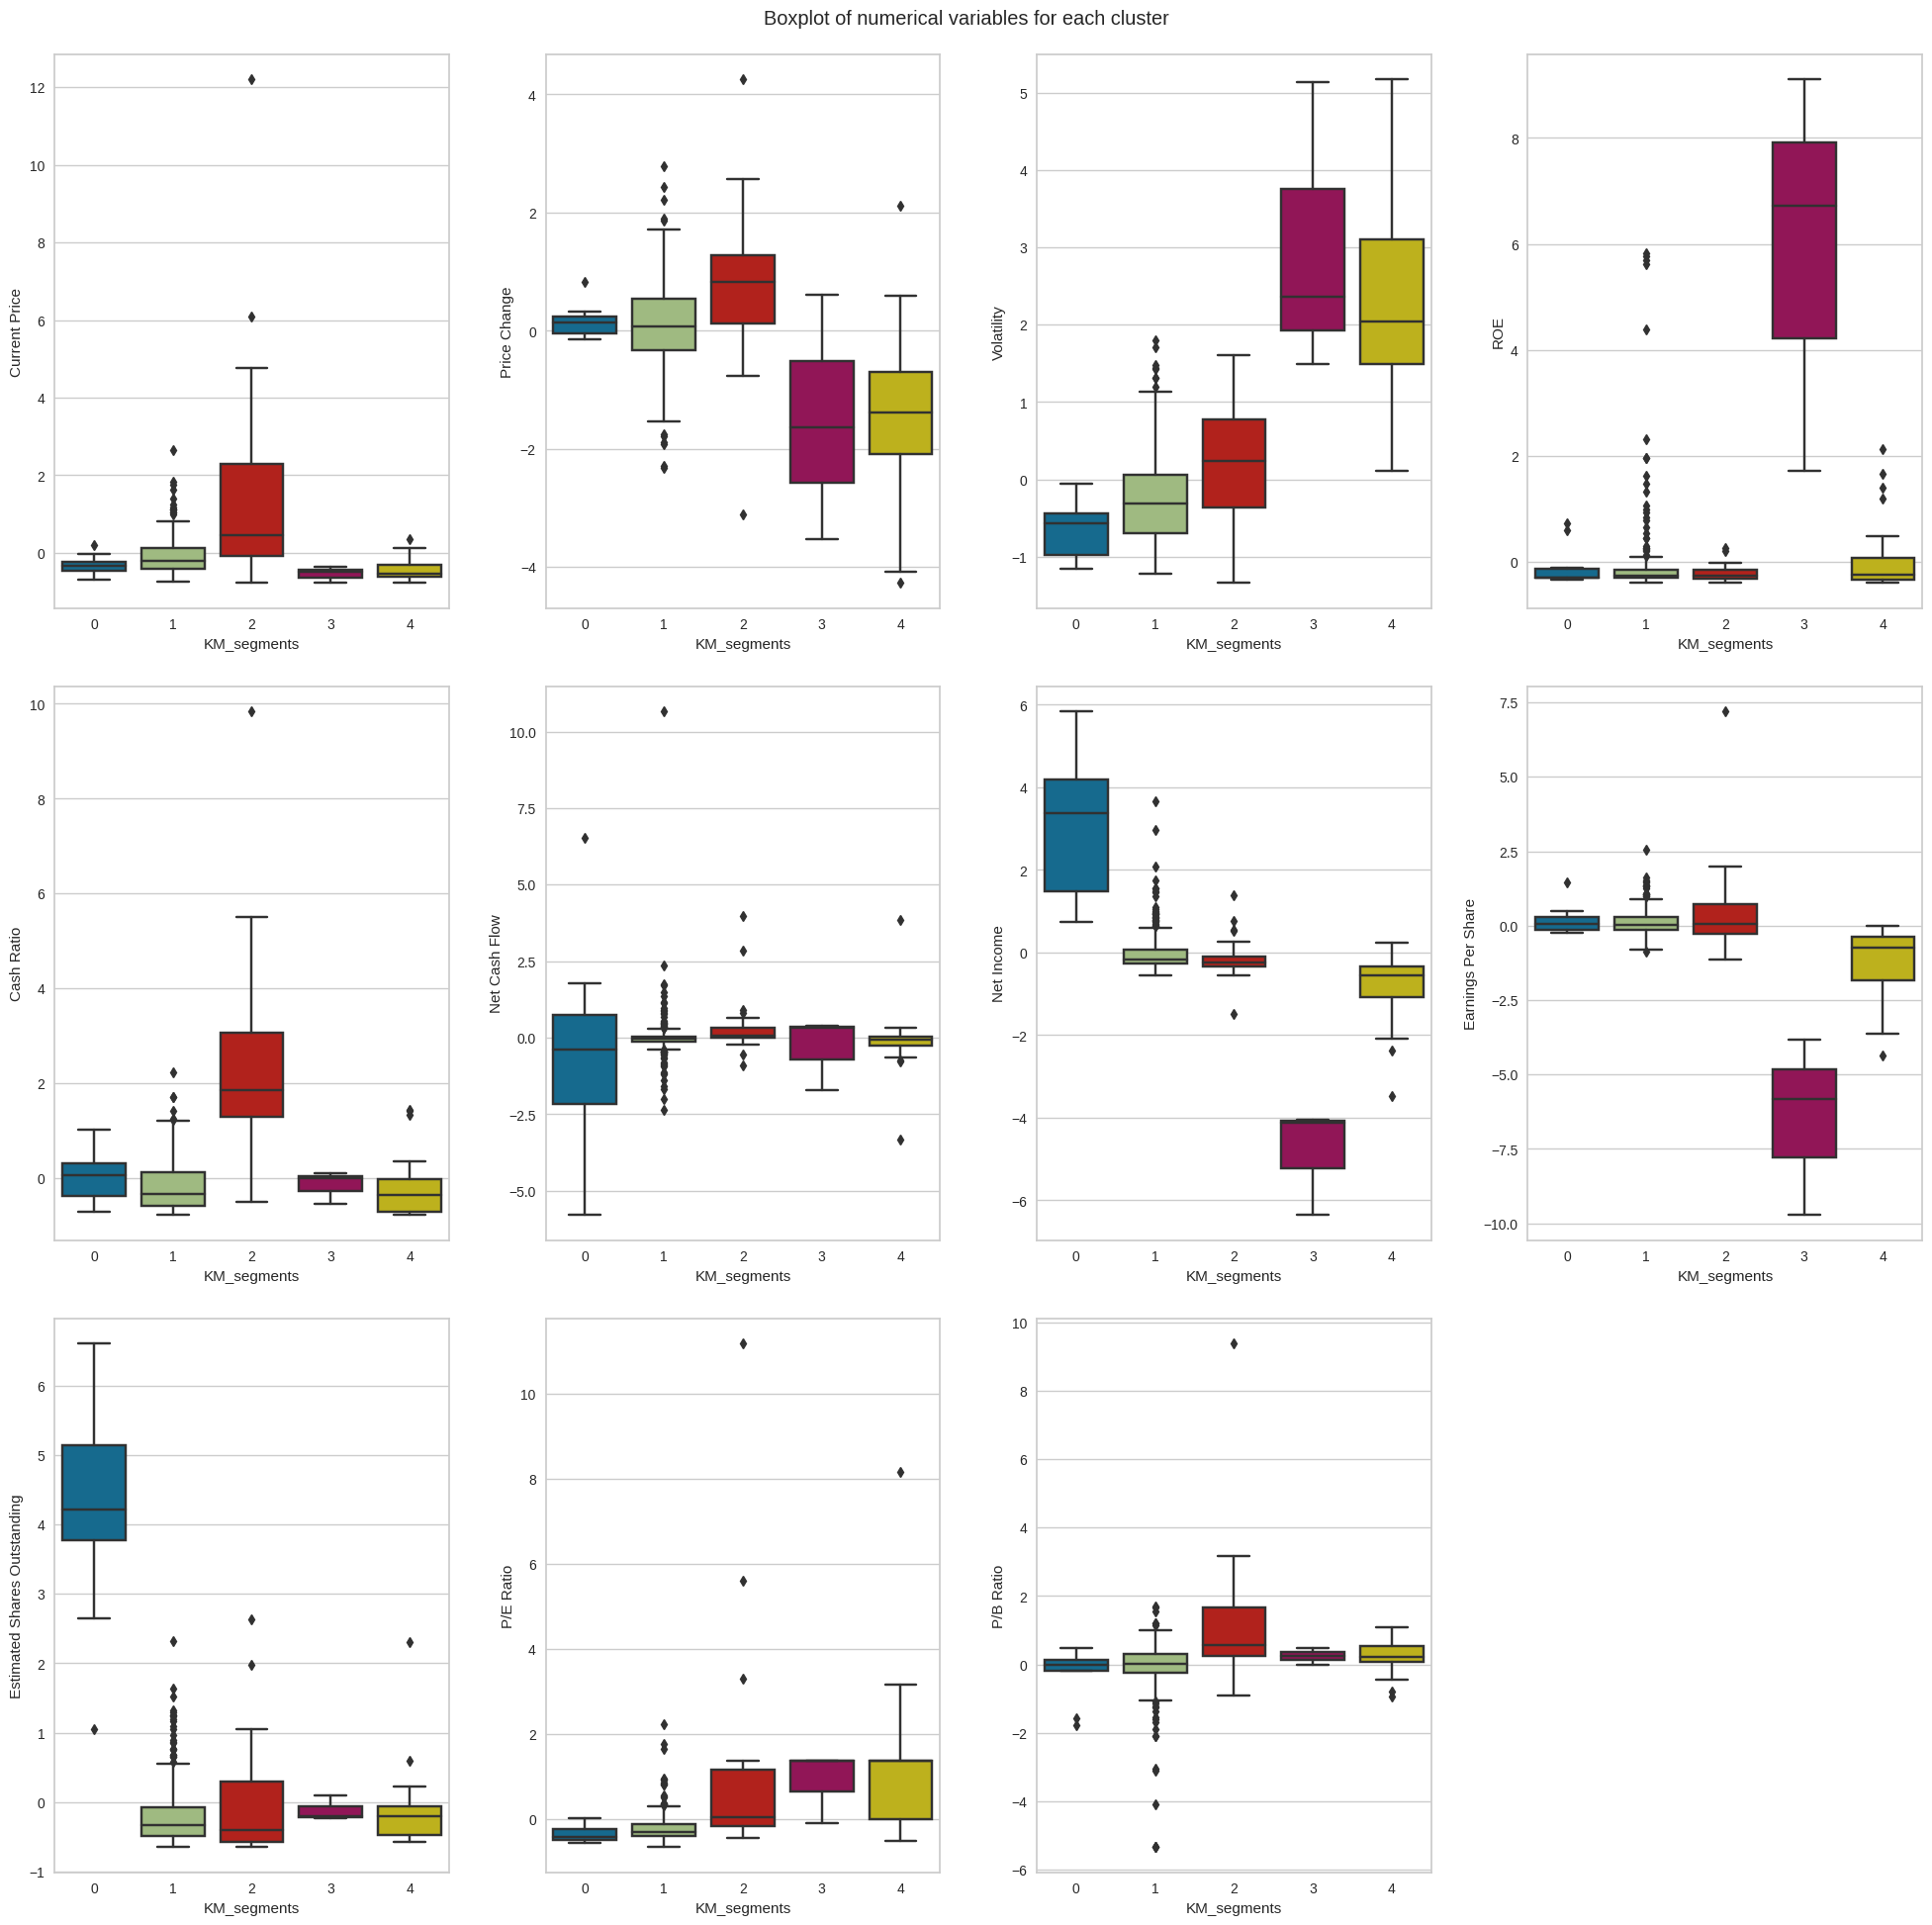

In [ ]:
plt.figure(figsize=(20, 20))
plt.suptitle("Boxplot of numerical variables for each cluster")

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(data=scaled_df_km, x="KM_segments", y=variable)

plt.tight_layout(pad=2.0)

### Insights

***Cluster 1: Average Investments***
- Similar to Cluster 3 from hierarchical clustering, these are average investments that don't excel at any particular metric. Have room to grow based on the P/B ratio, but the P/E ratio is not great, and the rest of the metrics are pretty average.

***Cluster 3 & 4: The big shorts***
- These are similar to Cluster 0 from hierarchical clustering. The only significant difference between #3 and #4 is that #3 has a much higher ROE, meaning they are better at turning equity into profit. But these companies share the same attributes as they have high volatility, had a price reduction, negative net cash floe, negative net income, negative earnings per share and pretty bad P/E ratio. Again, these are speculative stocks and could be shorted to generate profit.

***Cluster 2: Big and Safe***
- Similar to Cluster 1. These have a high current price, had a big positive price chnage, have the highest cash flow, a good net income, the highest earnings per share, but so much room to grow due to the P/B ratio being the highest. Makes sense since some of the companies in this cluster are Amazon, McDonalds, Facebook, TripAdvisor, and Yahoo.

***Cluster 0: Smart Bet***
- Similar to Cluster 2. These companies still have room to grow (P/B ratio of -4.5), have the highest estimated shares outstanding, the highest net income, and average volatility. The only difference between these and Cluster 2 from hierarchical, is that these have a negative net cash flow. However, taking a closer look, this could mean the company is spending cash either in rebuying company stock, assets, paying debt, etc. The cash could be moving towards somehting positive that could drive up the company's stock. Some of the companies are Pfizer, Coca Cola, Ford, AT&T, Wells Fargo, and Exxon.

## K-means vs Hierarchical Clustering

The final selected models were:

- **K-means clustering**: K=5.

- **Hierarchical clustering**: K=4 with Euclidean distance and Ward Linkage.


Most of the similarities and differences have already been discussed, however, here are some of the key elements:

- K-means clustering suggested a K between 4 and 6, similar to hierarchical where we were deciding between 4 and 5. At the end, we went for 5 at k-means, and 4 at hierarchical. However, the clusters turned out to be pretty close. Most of them having similar averages and characteristics, and only some minor differences. Getting similar clusters with 2 different techniques suggest that these are the best, or at least some of the best clusters that can be created given the data.

- Execution time was very short and therefore not long enough to identify a difference.

## Actionable Insights and Recommendations

Trade&Ahead provides personalized investment strategies, therefore, the consultants can use each of the clusters to explain and recommend different types of stocks depending on the risk profile, experience in the stock market, money available for investment, and expectations for the future.

- The companies in the Big & Safe (#1 from hierarchical and #2 from K-means) cluster are ideal for risk-adverse investors and investors looking for stability, long-term growth, and good earnings. However, these require a big investment upfront and probably won't experience drastic stock appreciation.

- Companies in The Big Short (0# from hierarchical and #3 & #4 from K-means) are better suited for experienced and very risk tolerant investors. These require deep market understanding and risk tolerance since the main strategy would be to short these stocks. Meaning you 'bet' that the stock price will decrese in the near future.

- Smart bet companies (#2 from hierarchical and #0 from K-means) are pretty much suited for everyone. They are a good investment overall. The strategy with these could be both long-term hold, and short-term gain. These stocks have the potential to 'quickly' grow and appreciate. At that moment the investor can decide either to sell and realize the profit, or hold long-term and increase its equity.

- Average investment companies (#3 from hierarchical and #1 from K-means) are that, average. However, they are very good against sudden drops in the stock market and crisis. These are better suited to complement an existing portfolio, or to distribute some equity in them so there's more base against a drop in the market.

___